In [1]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cmap

import timeit
import subprocess as subp

FGsize = (6,6)

<IPython.core.display.Javascript object>


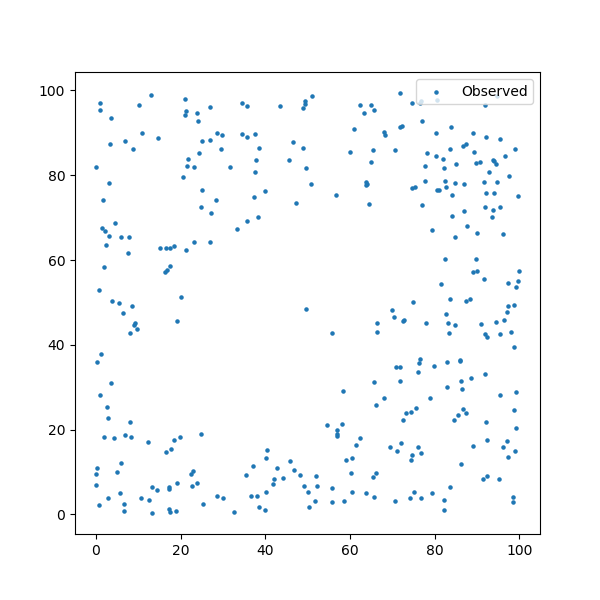

In [2]:
OC = np.loadtxt("observed_catalogs/oc.dat")

# z cut
Z_c = [50]

Xo = OC[:,0]
Yo = OC[:,1]
Zo = OC[:,2]

for z in Z_c:
    index = np.where( abs(Zo-z) < 5 )

    fig = plt.figure(figsize=FGsize)
    plt.scatter(Xo[index], Yo[index], s=5, label="Observed")
    plt.legend(loc="upper right")

<IPython.core.display.Javascript object>


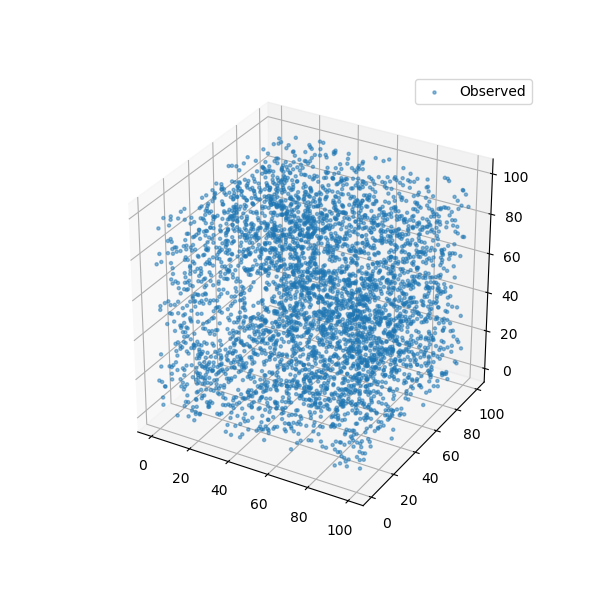

In [3]:
fig = plt.figure(figsize=FGsize)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(Xo,Yo,Zo, s=5, alpha=0.5, label="Observed")

ax.set_aspect(1)
ax.legend(loc=1)

In [3]:
def gen_random():
    L = 100
    x = np.random.rand() * L
    y = np.random.rand() * L
    z = np.random.rand() * L
    
    return [x,y,z]

In [4]:
np.random.seed(0)
RC = []
for i in range(OC.shape[0]):
    RC.append(gen_random())   
RC = np.array(RC)
np.savetxt( "random_catalogs/1.cat", RC)

In [5]:
RC.shape

(4183, 3)

<IPython.core.display.Javascript object>


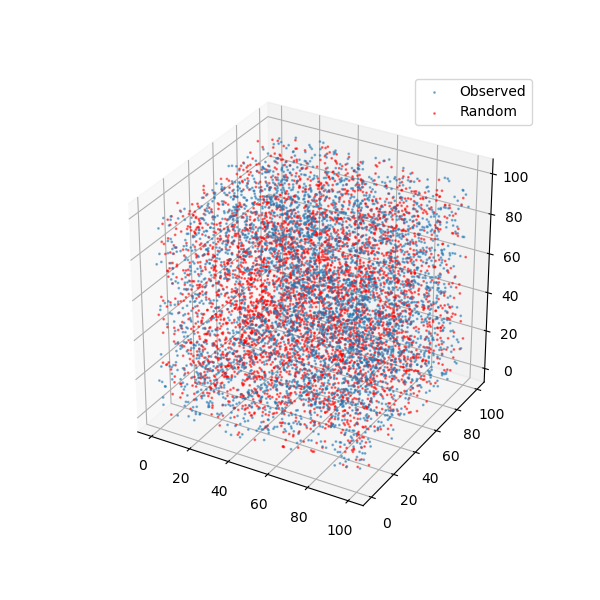

In [6]:
Xr = RC[:,0]
Yr = RC[:,1]
Zr = RC[:,2]



fig = plt.figure(figsize=FGsize)
ax = fig.add_subplot(111, projection='3d')

ax.scatter(Xo,Yo,Zo, s=1, alpha=0.5, label="Observed")
ax.scatter(Xr,Yr,Zr, s=1, c="r", alpha=0.5, label="Random")

ax.set_aspect(1)
ax.legend(loc=0)

In [7]:
def SCATTER_3d( cat1 , *args):    
    X1 = cat1[:,0]
    Y1 = cat1[:,1]
    Z1 = cat1[:,2]

    if(len(args)>=1):
        cat2 = args[0]
        X2 = cat2[:,0]
        Y2 = cat2[:,1]
        Z2 = cat2[:,2]

    if(len(args)>=2):
        cat3 = args[1]
        X3 = cat3[:,0]
        Y3 = cat3[:,1]
        Z3 = cat3[:,2]     
        
    

    fig = plt.figure(figsize=FGsize)
    ax = fig.add_subplot(111, projection='3d')
    ax.set_aspect(1)
    
    ax.scatter(X1, Y1, Z1, s=5, c="b", alpha=0.2)
    if(len(args)>=1):
        ax.scatter(X2, Y2, Z2, s=5, c="r", alpha=0.2)
    if(len(args)>=2):
        ax.scatter(X3, Y3, Z3, s=15, c="b", alpha=1)

In [8]:
def PLOT_SLICE_OF_CAT( cat1 , *args):
    
    slice_tickness = 10

    Z_c = [50]
    
    X1 = cat1[:,0]
    Y1 = cat1[:,1]
    Z1 = cat1[:,2]

    if(len(args)>=1):
        cat2 = args[0]
        X2 = cat2[:,0]
        Y2 = cat2[:,1]
        Z2 = cat2[:,2]

    if(len(args)>=2):
        cat3 = args[1]
        X3 = cat3[:,0]
        Y3 = cat3[:,1]
        Z3 = cat3[:,2]        

    for z in Z_c:
        fig = plt.figure(figsize=FGsize)
        
        index_1 = np.where( abs(Z1-z) < slice_tickness )
        plt.scatter(X1[index_1],  Y1[index_1], s=1, c="b")
        
        if(len(args)>=1):        
            index_2 = np.where( abs(Z2-z) < slice_tickness )
            plt.scatter(X2[index_2],  Y2[index_2], s=1, c="r")        

        if(len(args)>=2):        
            index_3 = np.where( abs(Z3-z) < slice_tickness )
            plt.scatter(X3[index_3],  Y3[index_3], s=15, c="g")        


<IPython.core.display.Javascript object>


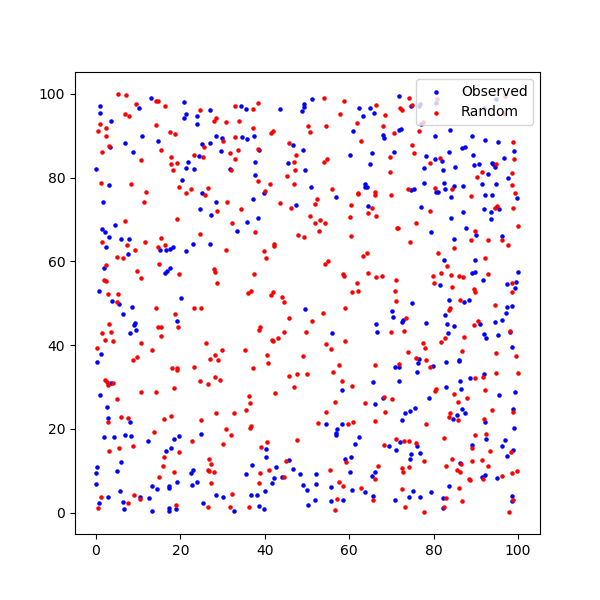

In [9]:

slice_tickness = 5
Z_c = [50]


for z in Z_c:
    fig = plt.figure(figsize=FGsize)
    index_1 = np.where( abs(Zo-z) < slice_tickness)
    index_2 = np.where( abs(Zr-z) < slice_tickness)
    
    plt.scatter( Xo[index_1], Yo[index_1], s = 5, c="blue", label="Observed")
    plt.scatter( Xr[index_2], Yr[index_2], s = 5, c="red", label="Random")
    
    
    plt.legend(loc=1)




In [10]:
FC = np.vstack([RC,OC])

In [11]:
FC.shape

(8366, 3)

In [12]:
RC.shape

(4183, 3)

In [13]:
np.savetxt("full_catalogs/1.cat", FC)

    subp.run("LSS_BSK_calc -input  " + fc_path + fc_filename +
             " -output " + str(FILENUM) +
             " -beta " + str(BETA) +
             " -printinfo True -numNNB 300"
             , shell=True, check=True)



In [14]:
OC_FILE_IN = "oc.dat"
FILENUM = "1"
BETA = 1.0
nrand = 1.0

prog = "progress.txt"


### Paths
RC_path = "random_catalogs/"
FC_path = "full_catalogs/"
OC_path = "observed_catalogs/"
BS_path = "xdl_beta_skeleton/"
ML_path = "masterlists/"
FG_path = "figures/"
VE_path = "volume_and_excentricity/"

OC_filename = OC_FILE_IN
FC_filename = "{}.cat".format(FILENUM)
RC_filename = "{}.cat".format(FILENUM)
BS_filename = "{}.BSKIndex".format(FILENUM)
ML_filename = "{}.mls".format(FILENUM)
FG_filename = "{}".format(FILENUM)
VE_filename = "{}.vae".format(FILENUM)

beta = BETA
n_rand = nrand

In [15]:
#################################################################
#                                                               #
#                    Void Finder Main Loop                      #
#                                                               #
#################################################################
beta = BETA
n_rand = nrand
toc = timeit.default_timer()
subp.run( "echo  Finding voids in {} >> {}".format(OC_FILE_IN, prog), shell=True, check=True)

InitialMessage  = "\n\n\n #########################################################"
InitialMessage += "\n\n Running with:\n"
InitialMessage += "\n\t n_rand = {}".format(n_rand)
InitialMessage += "\n\t beta   = {}".format(beta)

print(InitialMessage)
print(" Using this files:\n\t{}\n\t{}\n\t{}\n\t{}".format(RC_filename,FC_filename,BS_filename,OC_filename,ML_filename))

RC    = np.loadtxt(RC_path + RC_filename)
OC    = np.loadtxt(OC_path + OC_filename)
FC    = np.loadtxt(FC_path + FC_filename)
BS    = np.loadtxt(BS_path + BS_filename)

N_rnd = RC.shape[0]
N_obs = OC.shape[0]

print(" Reading Full Catalogs and Beta-Skeleton from:\n\t{}\n\t{}".format(FC_filename,BS_filename))
print(" Previous BetaSkeleton Shape before Stacking: ", BS.shape)

### Transforms Xiao-Dong Li's Beta Skeleton Index to long list

a = BS[:,0].astype(int)
a = list(a)
b = BS[:,1].astype(int)
b = list(b)

c = []
c.extend(a)
c.extend(b)
d = []
d.extend(b)
d.extend(a)

c = np.array(c, dtype=int)
d = np.array(d, dtype=int)

fcBSkel = np.vstack((c,d)).T

print("Next BetaSkeleton Shape after Stacking: ", fcBSkel.shape)

### Search for the first N_rnd points in the FC.

# Find RANDOM POINTS in the fcBeta-Skeleton Graph.
first_filter_index = np.where(fcBSkel[:,0] < N_rnd)  
    
# Store the partial Beta-Skeleton Graph of Random Points and
# its connections. They may have connections with Obs. points
# and other Random points.
first_filter_BSkel = np.array(fcBSkel[first_filter_index]).astype(int)

# Find the Random Points connected only to Random Points.

# To do this, first we find those points whom are connected to 
# observational points.
second_filter_index = np.where( first_filter_BSkel[:,1] >= N_rnd )[0]
    
# They are going to be dropped.
particle_ID_to_drop = first_filter_BSkel[second_filter_index,0]
particle_ID_to_drop.sort()
# A set of the Random Points connected to Observational points
# is created, there are not repeated items.
droplist = set(particle_ID_to_drop)

print( "First filter shape:", first_filter_BSkel.shape, 
       "\nHow many of them have direct connections"+
       " with galaxies (i.e. droplist length)", 
       len(droplist),
       "\nThen, must survive", len(set(first_filter_BSkel[:,0])) -len(droplist), 
       "trueVoidPoints")

# We have the Random points set:
# Maybe not all Random Particles are connected to the Skeleton. (large Beta)
# Because of this, we doesn't take into account something like
# Points_in_Skeleton = range(0,N_rnd).


print('Checking Random Points in the Beta Skeleton')
Points_in_Skeleton = set(first_filter_BSkel[:,0])
print('Random Points in Beta Skeleton Checked') 

# and the droplist. The complement(difference) is the
# pure void points set.

print('')
trueVoidPointsIndex = Points_in_Skeleton.difference(droplist)
# This set is converted to list, it will be used as an index to find 
# True Voids.
trueVoidPointsIndex = list(trueVoidPointsIndex)
trueVoidPointsIndex.sort()

# This is the first definition of TRUE VOID POINTS.
# Catalog of particles in voids
void_cat = FC[trueVoidPointsIndex]

### True Voids have been foud. #########################################
########################################################################

### Looking for the connections of the TrueVoidPoints
    
index=[]
for k in trueVoidPointsIndex:
    index.extend( list( np.where( fcBSkel[:,0] == k)[0].astype(int) ) )
    
    index = list(set(index ) )
    index.sort()
# DEBUG
#print(index)

# Beta-Skeleton of TrueVoidPoints (includes Frontier Points)
VoidsBS = np.array(fcBSkel[index]).astype(int)
trueVoidPointsIndex.sort()
    
print(" Void BetaSkeleton Shape: ", VoidsBS.shape)
print(" The len of trueVoidPointsIndex", len(trueVoidPointsIndex))

# This is the MasterList of Voids.

# Each TrueVoidPoint_index is checked.
# If doesn't exists, is identified as a new void (a new sublist is created)
# If it exists already, the point and its connections are added to the existing void sublist.
    
print(" Initialize MasterList.")


MasterList = []


counter = 0
for search in trueVoidPointsIndex:

    ## DEBUG
    counter += 1
    print(search, len(MasterList))


    # Does the TrueVoidPoint belongs to any existing Void?
    is_in_master = any( search in sublist for sublist in MasterList)
    

    # Create a new void.
    # If is the first time it appears on the MasterList
    if not is_in_master:
        my_list = []

        # Find B-Skeleton connections of the TrueVoidPoint.
        index = np.where(VoidsBS[:,0] == search)
        # Append them to the auxiliar list.
        my_list.append(search)
        my_list.extend( list(VoidsBS[index,1][0]) )
        my_list.sort()
        # Append this auxiliar list to the MasterList.
        # a new void has been appended. :)       
        MasterList.append(my_list)

        ## DEBUG
        print("Is not in the list", my_list)
        
    # If the TrueVoidPoint already exists in the Masterlist
    if is_in_master:
        repetitions = []
        
        # Find how many times the TrueVoidPoint has appeared before
        # in the MasterList. (Store the search)
        for k in range(len(MasterList)):
            if(search in MasterList[k]):
                sublist = MasterList[k]
                #print("Si est'a en la sublista", k, sublist)
                repetitions.append(k)
                
                #print(search, "appears in sublists:" , repetitions)

        # If it appears only in one time in the sublitst, append the 
        # TrueVoidPont and its B-Skeleton connections to the existing void.
        if ( len(repetitions) == 1 ):
            j = repetitions[0]
            index = np.where(VoidsBS[:,0] == search)
            my_list = list(VoidsBS[index,1][0])
            my_list.sort()
            MasterList[j].extend(my_list)
            
            ## DEBUG
            print("Is One time in the list", my_list, '\n', MasterList[j])
            

            # If the TrueVoidPoint appears more than one time, the lists
            # will merge into a new one.
            # Old lists will be empty. They will be removed after this
            # cicle ends.
        elif (len(repetitions) > 1):            
        
            # print("Friend of many friends, n=", len(repetitions))
            my_list = []
            for j in repetitions:
                my_list.extend(MasterList[j]) # collect data create a new list
                MasterList[j]=[]              # Empty the merged lists.
                my_list.sort()
            
            MasterList.append(my_list)


            
# Emtpy lists removed. 
while( [] in MasterList):
    MasterList.remove([])


# Sort each void list at the MasterList
for j in range(len(MasterList)):
    MasterList[j] = list( set(MasterList[j]))
    MasterList[j].sort()

print("\nRaw Masterlist created\n")           




# Some lists may share elements (FrontierPoints).
# Those FrontierPoints may be in a BottleNeck
# 
#                       
#     T       F    Halo     F     T   
#                                     T
#       T       F <----> F      T
#   T                                 T
#        T     F    Halo    F   T
#
#   Void_1                       Void_2
#
#

# This is a list of voids and the common particles.
to_merge = []
for i in range(len(MasterList)):              # For each VoidList
    for j in range(len(MasterList)):          # compare against other VoidLists
        if (j > i):
            # Check if two or more lists have common elements.
            aux = [x for x in MasterList[i] if x in MasterList[j]]
            # Store the common elements in the aux list.
            
            if (len(aux)>0):              # If the list is not empty
                # Void[i], Void[j], common particles.
                # print( i, j, aux)
                to_merge.append([i,j])   # Store the two void indices.
                
                ## NOTE: Many voids can be concatenated.


# This is a recount to concatenate those voids that share
# particles. Runs over the previous "to merge" list.

to_merge2 = []
for i in range( len(to_merge)):
    x = to_merge[i][0]
    y = to_merge[i][1]
    
    is_in_list1 = any( x in sublist for sublist in to_merge2 )
    is_in_list2 = any( y in sublist for sublist in to_merge2 )

    if( (is_in_list1 == False) & (is_in_list2 == False) ):
        to_merge2.append(to_merge[i])
        
    elif( (is_in_list1 == False) & (is_in_list2 == True) ):
        aux = []
        for j in range(len(to_merge2)):
            if( y in to_merge2[j]):
                to_merge2[j].append(x)

    elif( (is_in_list1 == True) & (is_in_list2 == False) ):
        aux = []
        for j in range(len(to_merge2)):
            if( x in to_merge2[j]):
                to_merge2[j].append(y)


for x in to_merge2:
    x.sort()

print( " ---> Control: Length of the list 'to_merge2': " + str( len(to_merge2) ) )



for sublist in to_merge2:
    aux = []
    for x in sublist:
        aux.extend(MasterList[x])
        MasterList[x] = []
        aux.sort()
        MasterList.append(aux)
        
while( [] in MasterList):
    MasterList.remove([])

    
print(" Total number of Void Particles\n\t", len(trueVoidPointsIndex))

aux = 0
for Void in MasterList:
    #print( len(Void))
    aux += len(Void)
    
    if len(Void)<2:
        print( Void)

print("Total number of particles in Voids and close to filaments:", aux , "(Void + Frontier particles)")





#################################################################
#                                                               #
#                Store the Void Masterlist                      #
#                                                               #
#################################################################

X = RC[:,0]
Y = RC[:,1]
Z = RC[:,2]

with open(ML_path + ML_filename, 'w') as file:

    for k in range(len(MasterList)):   
        for particle in MasterList[k]:
            line  = str( k *1.0) + " " 
            line += str(X[particle]) + " " 
            line += str(Y[particle]) + " " 
            line += str(Z[particle] ) + "\n"
            
            file.write(line)

    tic = timeit.default_timer()

FinalMessage = "\n\n We have fihished the process of "
FinalMessage += "\n Finding Voids in the file with "
FinalMessage += "\n beta: \t{}".format(beta)
FinalMessage += "\n n_rnd:\t{}".format(n_rand)
FinalMessage += "\n\n\tOutput written in \n" + ML_path + ML_filename
FinalMessage += "\n\n\t Time elapsed:{} seconds".format(tic - toc)
FinalMessage += "\n ###############################################"

print(FinalMessage)

subp.run( "echo Filenumber {}, beta {}, n_rand {}, voids found in {} seconds. >> {}".format(FILENUM, beta, n_rand, tic-toc, prog), shell=True, check=True)




 #########################################################

 Running with:

	 n_rand = 1.0
	 beta   = 1.0
 Using this files:
	1.cat
	1.cat
	1.BSKIndex
	oc.dat
 Reading Full Catalogs and Beta-Skeleton from:
	1.cat
	1.BSKIndex
 Previous BetaSkeleton Shape before Stacking:  (31104, 2)
Next BetaSkeleton Shape after Stacking:  (62208, 2)
First filter shape: (31363, 2) 
How many of them have direct connections with galaxies (i.e. droplist length) 3811 
Then, must survive 372 trueVoidPoints
Checking Random Points in the Beta Skeleton
Random Points in Beta Skeleton Checked

 Void BetaSkeleton Shape:  (2723, 2)
 The len of trueVoidPointsIndex 372
 Initialize MasterList.
15 0
Is not in the list [15, 712, 944, 2163, 3175, 3330]
21 1
Is not in the list [21, 185, 238, 782, 1043, 1326, 2205, 2345, 2409, 3475]
27 2
Is not in the list [27, 194, 1273, 1390, 2456, 3052, 4140]
35 3
Is not in the list [35, 45, 415, 1843, 1986, 2018, 2137, 2171, 2622, 2672, 3071, 3843]
45 4
Is One time in the list [35, 

3226 156
Is not in the list [974, 2024, 3226, 3679]
3227 157
3239 158
Is not in the list [143, 2196, 2982, 3239, 3541, 3861]
3242 159
Is One time in the list [43, 231, 243, 568, 758, 1587, 2773, 3296, 3853] 
 [19, 21, 21, 26, 63, 63, 65, 66, 66, 78, 105, 113, 115, 135, 135, 135, 145, 145, 145, 146, 146, 146, 155, 155, 155, 155, 165, 165, 165, 165, 165, 166, 169, 169, 185, 185, 185, 202, 202, 203, 203, 203, 203, 203, 210, 210, 210, 221, 221, 223, 226, 226, 226, 226, 226, 226, 231, 231, 231, 231, 238, 243, 243, 243, 243, 243, 243, 243, 244, 244, 244, 267, 267, 282, 282, 291, 291, 291, 291, 291, 291, 299, 299, 305, 312, 312, 318, 318, 318, 321, 321, 321, 321, 321, 321, 325, 325, 325, 337, 337, 345, 345, 369, 370, 370, 370, 371, 380, 380, 382, 382, 382, 382, 390, 446, 450, 450, 459, 461, 461, 467, 467, 474, 474, 474, 477, 477, 477, 477, 477, 477, 496, 496, 521, 521, 522, 522, 537, 537, 537, 537, 540, 547, 547, 561, 568, 568, 568, 568, 583, 583, 583, 595, 595, 595, 610, 610, 610, 610, 610, 

CompletedProcess(args='echo Filenumber 1, beta 1.0, n_rand 1.0, voids found in 1.4266534119960852 seconds. >> progress.txt', returncode=0)

In [16]:
Xv = void_cat[:,0]
Yv = void_cat[:,1]
Zv = void_cat[:,2]

<IPython.core.display.Javascript object>


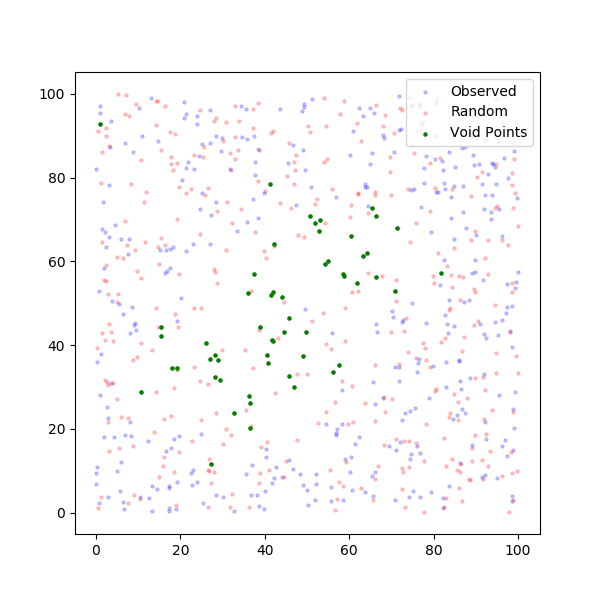

In [17]:

slice_tickness = 5
Z_c = [50]


for z in Z_c:
    fig = plt.figure(figsize=FGsize)
    index_1 = np.where( abs(Zo-z) < slice_tickness)
    index_2 = np.where( abs(Zr-z) < slice_tickness)
    index_3 = np.where( abs(Zv-z) < slice_tickness)
    
    plt.scatter( Xo[index_1], Yo[index_1], s = 5, c="blue", label="Observed", alpha=0.2)
    plt.scatter( Xr[index_2], Yr[index_2], s = 5, c="red", label="Random", alpha=0.2)

    plt.scatter( Xv[index_3], Yv[index_3], s = 5, c="green", label="Void Points")

    
    plt.legend(loc=1)

<IPython.core.display.Javascript object>


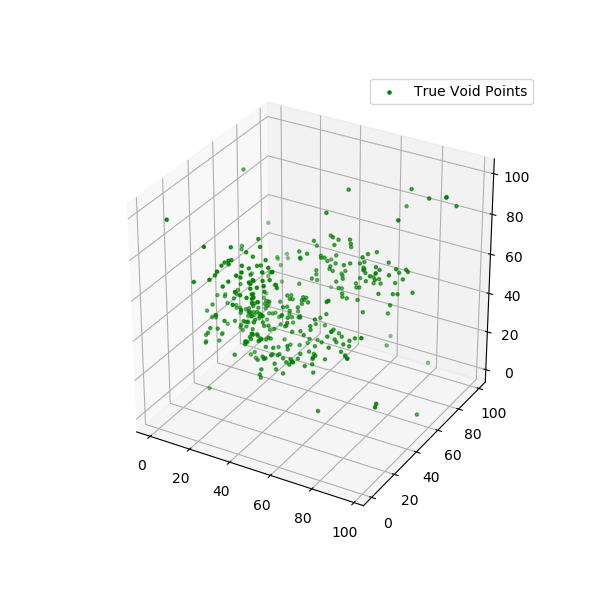

In [24]:
fig = plt.figure(figsize=FGsize)
ax = fig.add_subplot(111, projection='3d')

ax.scatter(Xv, Yv, Zv, c="green", s=5, label="True Void Points")
ax.legend(loc=1)

In [18]:
index = []
for i in range(fcBSkel.shape[0]):
    if fcBSkel[i,0] in trueVoidPointsIndex:
        index.append(i)

<IPython.core.display.Javascript object>


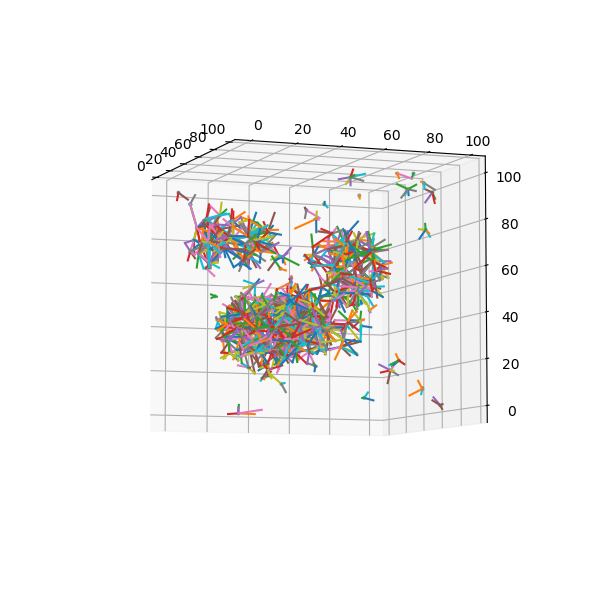

In [19]:

fig = plt.figure(figsize=FGsize)
ax = fig.add_subplot(111, projection='3d')
ax.set_aspect(1)

ax.scatter(Xv,Yv, Zv, s=4, alpha=0.5)

for n in range(len(index)):
    i = fcBSkel[index[n],0]
    j = fcBSkel[index[n],1]
    ax.plot([Xr[i],Xr[j]], [Yr[i],Yr[j]], [Zr[i],Zr[j]])


In [20]:
len(index)

2723

$\beta$

In [21]:
### Looking for the connections of the TrueVoidPoints
    
index = []
for i in range(fcBSkel.shape[0]):
    if fcBSkel[i,0] in trueVoidPointsIndex:
        index.append(i)

# Beta-Skeleton of TrueVoidPoints (includes Frontier Points)
VoidsBS = np.array(fcBSkel[index]).astype(int)
trueVoidPointsIndex.sort()
    
print(" Void BetaSkeleton Shape: ", VoidsBS.shape)
print(" The len of trueVoidPointsIndex", len(trueVoidPointsIndex))

# This is the MasterList of Voids.

# Each TrueVoidPoint_index is checked.
# If doesn't exists, is identified as a new void (a new sublist is created)
# If it exists already, the point and its connections are added to the existing void sublist.
    
print(" Initialize MasterList.")


 Void BetaSkeleton Shape:  (2723, 2)
 The len of trueVoidPointsIndex 372
 Initialize MasterList.


Aquí vamos bien entendido.

Mi'ercp;e en la nochecita

In [26]:
counter = 0
MasterList = []

for search in trueVoidPointsIndex:
    
    # Does the TrueVoidPoint belongs to any existing Void?
    is_in_master = any([search in sublist for sublist in MasterList])   
    
    # Create a new void.
    # If is the TrueVoidPariticle called "search" does not 
    # appears on the MasterList
    if not is_in_master:
        my_list = []

        # Find B-Skeleton connections of the TrueVoidPoint.
        index = np.where(VoidsBS[:,0] == search)
        # Append them to the auxiliar list.
        my_list.append(search)
        
        aux = list(VoidsBS[index,1][0])
        aux2=[]
        for point in aux:
            if point < N_rnd:
                aux2.append(point)
        my_list.extend( aux2 )
        my_list.sort()
        # Append this auxiliar list to the MasterList.
        # a new void has been appended. :)
        MasterList.append(my_list)

    # If the "search" already exists as a neighour of previous
    # search or searches, chech if appears in one void
    # or if is neccesary to merge multiple voids.
    if is_in_master :
        IsInMasterList = [search in sublist for sublist in MasterList]
        index_of_repetitions = [i for i, x in enumerate(IsInMasterList) if x]
        print(index_of_repetitions)
        
        
        # If the "search"(trueVoidParticle) exists only in an
        # existing void, then add the neighbours to that void
        if(len(index_of_repetitions) == 1):
            i_k = index_of_repetitions[0]
            
            index_neigh = np.where(VoidsBS[:,0] == search)            
            neighbours = list(VoidsBS[index,1][0])
            neighbours.sort()
            
            aux = []
            for point in neighbours:
                if point < N_rnd:
                    aux.append(point)
            
            MasterList[i_k].extend(aux)
            MasterList[i_k].sort()
            MasterList[i_k] = list(set(MasterList[i_k]))

            
        if(len(index_of_repetitions) > 1):
            l_k = index_of_repetitions
            
            index_neigh = np.where(VoidsBS[:,0] == search)            
            neighbours = list(VoidsBS[index,1][0])
            neighbours.sort()
        
            aux = []
            for point in neighbours:
                if point < N_rnd:
                    aux.append(point)
            neighbours = aux
            
            new_void = []
            for l in l_k:
                new_void.extend(MasterList[l])
                MasterList[l] = []
            new_void.extend(neighbours)
            new_void = list(set(new_void))
            
            MasterList.append(new_void)
    """
    # If the TrueVoidPoint already exists in the Masterlist
    if is_in_master:
        repetitions = []
        
        # Find how many times the TrueVoidPoint has appeared before
        # in the MasterList. (Store the search)
        for k in range(len(MasterList)):
            if(search in MasterList[k]):
                sublist = MasterList[k]
                print("Si est'a en la sublista", k, sublist)
                repetitions.append(k)
                
                print(search, "appears in sublists:" , repetitions)

        # If it appears only in one time in the sublitst, append the 
        # TrueVoidPont and its B-Skeleton connections to the existing void.
        if ( len(repetitions) == 1 ):
            j = repetitions[0]
            index = np.where(VoidsBS[:,0] == search)
            my_list = list(VoidsBS[index,1][0])
            my_list.sort()
            MasterList[j].extend(my_list)


            # If the TrueVoidPoint appears more than one time, the lists
            # will merge into a new one.
            # Old lists will be empty. They will be removed after this
            # cicle ends.
        elif (len(repetitions) > 1):            
        
            # print("Friend of many friends, n=", len(repetitions))
            my_list = []
            for j in repetitions:
                my_list.extend(MasterList[j]) # collect data create a new list
                MasterList[j]=[]              # Empty the merged lists.
                my_list.sort()
                MasterList.append(my_list)
    """         
    
    #debugging
    counter += 1
    if counter == len(trueVoidPointsIndex):
        break
    
# Emtpy lists removed. 
while( [] in MasterList):
    MasterList.remove([])


# Sort each void list at the MasterList
for j in range(len(MasterList)):
    MasterList[j] = list( set(MasterList[j]))
    MasterList[j].sort()

print("\nRaw Masterlist created\n")           


[3]
[4]
[2]
[13]
[6]
[13, 16, 20]
[17, 23]
[30]
[7, 12]
[33]
[21]
[3]
[22]
[33, 39]
[30, 31]
[42]
[42]
[21]
[14, 21]
[24]
[28]
[10, 26]
[28, 37]
[55]
[1, 42]
[47]
[9]
[6]
[50]
[24]
[47]
[58]
[6, 19, 58]
[53]
[46]
[49]
[29]
[32, 40, 49]
[44, 67, 73]
[24]
[74]
[2, 4, 15]
[46]
[24, 29, 72, 74]
[57]
[57, 75, 78]
[8]
[18]
[9, 47, 50, 59, 80]
[84]
[77]
[84]
[61, 84]
[25, 53]
[65, 77]
[27, 79, 87, 90]
[46, 96]
[97]
[97]
[60, 91]
[95, 97, 98]
[99]
[93, 99]
[102]
[107]
[102]
[22, 38]
[18]
[102]
[102]
[102]
[102, 103]
[113, 114]
[116]
[116]
[3, 83, 106, 116]
[122]
[122]
[122]
[48, 122]
[43, 123]
[124]
[124]
[62, 117]
[81]
[124]
[124]
[124]
[124]
[101, 110, 124]
[109, 128]
[129]
[129]
[88, 129]
[18, 107, 108, 130]
[132]
[132]
[132]
[132]
[94, 132]
[136]
[86, 131, 136]
[5, 137]
[138]
[138]
[138]
[45]
[126]
[119, 138]
[143]
[100, 143]
[125, 145]
[66, 68, 133, 147]
[148]
[8]
[148]
[118, 148]
[155]
[155]
[45, 155, 156]
[158]
[158]
[158]
[158]
[158]
[146, 158]
[120]
[159]
[127, 159]
[160]
[160]
[160]


In [27]:
s = 0
for i in range( len(MasterList) ):
    
    l  = len(MasterList[i])
    print(i, l)
    

0 6
1 6
2 2
3 7
4 3
5 5
6 6
7 3
8 5
9 4
10 5
11 3
12 9
13 9
14 4
15 6
16 7
17 4
18 6
19 7
20 4
21 7
22 8
23 5
24 6
25 4
26 6
27 5
28 8
29 4
30 6
31 5
32 4
33 4
34 9
35 6
36 7
37 5
38 5
39 6
40 9
41 8
42 6
43 8
44 8
45 637


In [28]:
# Some lists may share elements (FrontierPoints).
# Those FrontierPoints may be in a BottleNeck
# 
#                       
#     T       F    Halo     F     T   
#                                     T
#       T       F <----> F      T
#   T                                 T
#        T     F    Halo    F   T
#
#   Void_1                       Void_2
#
#

# This is a list of voids and the common particles.
to_merge = []
for i in range(len(MasterList)):              # For each VoidList
    for j in range(len(MasterList)):          # compare against other VoidLists
        if (j > i):
            # Check if two or more lists have common elements.
            aux = [x for x in MasterList[i] if x in MasterList[j]]
            # Store the common elements in the aux list.
            
            if (len(aux)>0):              # If the list is not empty
                # Void[i], Void[j], common particles.
                # print( i, j, aux)
                to_merge.append([i,j])   # Store the two void indices.
                
                ## NOTE: Many voids can be concatenated.

print(to_merge)
# This is a recount to concatenate those voids that share
# particles. Runs over the previous "to merge" list.


[[2, 33], [2, 45], [5, 20], [5, 45], [8, 45], [9, 45], [11, 45], [12, 17], [12, 45], [13, 45], [16, 30], [16, 45], [17, 45], [18, 45], [19, 45], [20, 45], [21, 45], [22, 45], [26, 45], [27, 45], [28, 45], [30, 45], [32, 45], [33, 45], [34, 45], [35, 45], [36, 45], [38, 43], [38, 45], [39, 45], [40, 45], [43, 45], [44, 45]]


In [29]:

to_merge2 = []
for i in range( len(to_merge)):
    x = to_merge[i][0]
    y = to_merge[i][1]
    
    
    is_in_list1 = any( [x in sublist for sublist in to_merge2] )
    is_in_list2 = any( [y in sublist for sublist in to_merge2] )


    if( (is_in_list1 == False) & (is_in_list2 == False) ):
        to_merge2.append(to_merge[i])
        
    elif( (is_in_list1 == False) & (is_in_list2 == True) ):
        aux = []
        for j in range(len(to_merge2)):
            if( y in to_merge2[j]):
                to_merge2[j].append(x)

    elif( (is_in_list1 == True) & (is_in_list2 == False) ):
        aux = []
        for j in range(len(to_merge2)):
            if( x in to_merge2[j]):
                to_merge2[j].append(y)

    
for x in to_merge2:
    x.sort()

print( " ---> Control: Length of the list 'to_merge2': " + str( len(to_merge2) ) )

 ---> Control: Length of the list 'to_merge2': 5


In [30]:
to_merge2

[[2,
  8,
  9,
  11,
  13,
  18,
  19,
  21,
  22,
  26,
  27,
  28,
  32,
  33,
  34,
  35,
  36,
  39,
  40,
  44,
  45],
 [5, 20],
 [12, 17],
 [16, 30],
 [38, 43]]

In [31]:

for sublist in to_merge2:
    aux = []
    for x in sublist:
        aux.extend(MasterList[x])
        MasterList[x] = []
        aux.sort()
        MasterList.append(aux)
        
while( [] in MasterList):
    MasterList.remove([])

    
print(" Total number of Void Particles\n\t", len(trueVoidPointsIndex))

aux = 0
for Void in MasterList:
    #print( len(Void))
    aux += len(Void)
    
    if len(Void)<2:
        print( Void)

print("Total number of particles in Voids and close to filaments:", aux , "(Void + Frontier particles)")





#################################################################
#                                                               #
#                Store the Void Masterlist                      #
#                                                               #
#################################################################

X = RC[:,0]
Y = RC[:,1]
Z = RC[:,2]

with open(ML_path + ML_filename, 'w') as file:

    for k in range(len(MasterList)):   
        for particle in MasterList[k]:
            line  = str( k *1.0) + " " 
            line += str(X[particle]) + " " 
            line += str(Y[particle]) + " " 
            line += str(Z[particle] ) + "\n"
            
            file.write(line)

    #tic = timeit.default_timer()

FinalMessage = "\n\n We have fihished the process of "
FinalMessage += "\n Finding Voids in the file with "
FinalMessage += "\n beta: \t{}".format(beta)
FinalMessage += "\n n_rnd:\t{}".format(n_rand)
FinalMessage += "\n\n\tOutput written in \n" + ML_path + ML_filename
#FinalMessage += "\n\n\t Time elapsed:{} seconds".format(tic - toc)
FinalMessage += "\n ###############################################"

print(FinalMessage)

#subp.run( "echo Filenumber {}, beta {}, n_rand {}, voids found in {} seconds. >> {}".format(FILENUM, beta, n_rand, tic-toc, prog), shell=True, check=True)


 Total number of Void Particles
	 372
Total number of particles in Voids and close to filaments: 16145 (Void + Frontier particles)


 We have fihished the process of 
 Finding Voids in the file with 
 beta: 	1.0
 n_rnd:	1.0

	Output written in 
masterlists/0.mls
 ###############################################


In [32]:
MasterList

[[15, 712, 944, 2163, 3175, 3330],
 [150, 1974, 2154, 2278, 2361, 2393],
 [448, 546, 814, 832, 1758, 2652, 3601],
 [641, 3759, 4052],
 [880, 1808, 2566, 3248, 3609, 4014],
 [355, 884, 1080],
 [395, 1007, 1052, 1997, 3027],
 [1560, 2822, 3274, 3444],
 [176, 1592, 1706, 1836, 2138, 3924],
 [147, 457, 2458, 2473, 2735],
 [3, 445, 907, 2516, 3386, 3748],
 [658, 2536, 2591, 2670],
 [1100, 1953, 2839, 3560],
 [4, 229, 619, 3221, 3387],
 [1830, 2703, 3488, 3816, 4168],
 [324, 349, 1447, 1628, 2976, 3057, 3327, 3955],
 [1197, 1261, 2527, 3002, 3451, 3960],
 [0,
  6,
  6,
  13,
  16,
  21,
  26,
  27,
  35,
  45,
  49,
  49,
  53,
  53,
  62,
  65,
  71,
  78,
  81,
  102,
  105,
  109,
  113,
  114,
  135,
  143,
  145,
  146,
  148,
  155,
  165,
  166,
  171,
  184,
  185,
  189,
  194,
  202,
  203,
  213,
  213,
  221,
  221,
  223,
  225,
  226,
  227,
  231,
  238,
  238,
  243,
  244,
  267,
  282,
  282,
  284,
  284,
  291,
  296,
  299,
  305,
  312,
  314,
  314,
  317,
  318,
  321

<IPython.core.display.Javascript object>


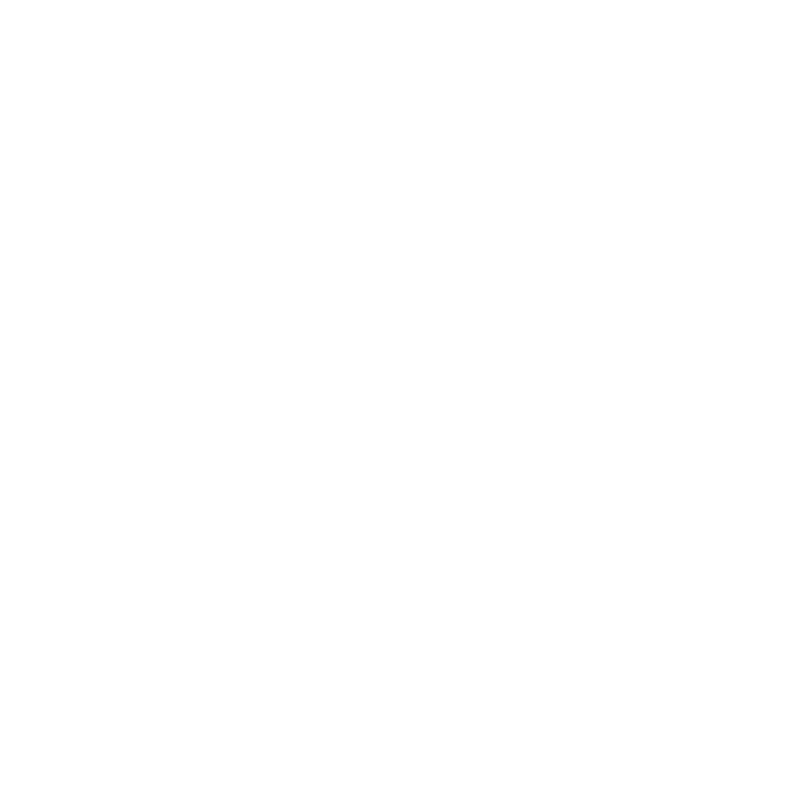

<IPython.core.display.Javascript object>


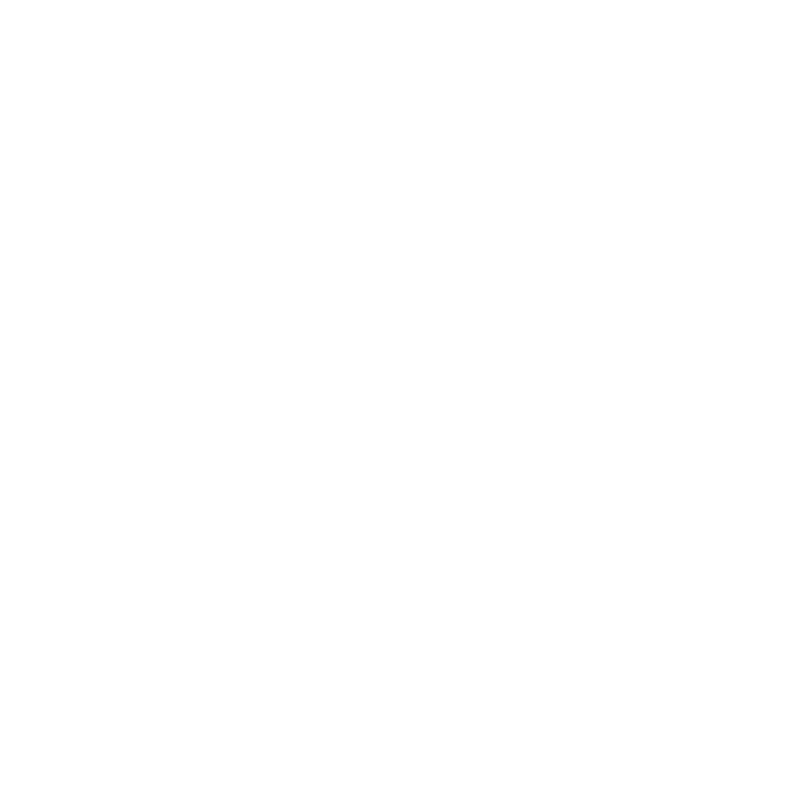

<IPython.core.display.Javascript object>


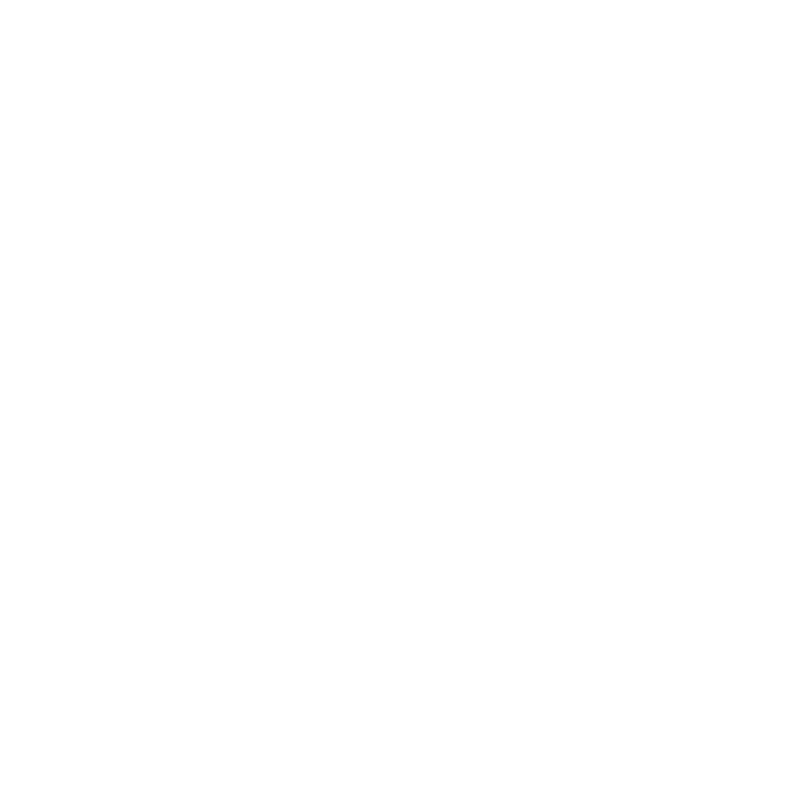

<IPython.core.display.Javascript object>


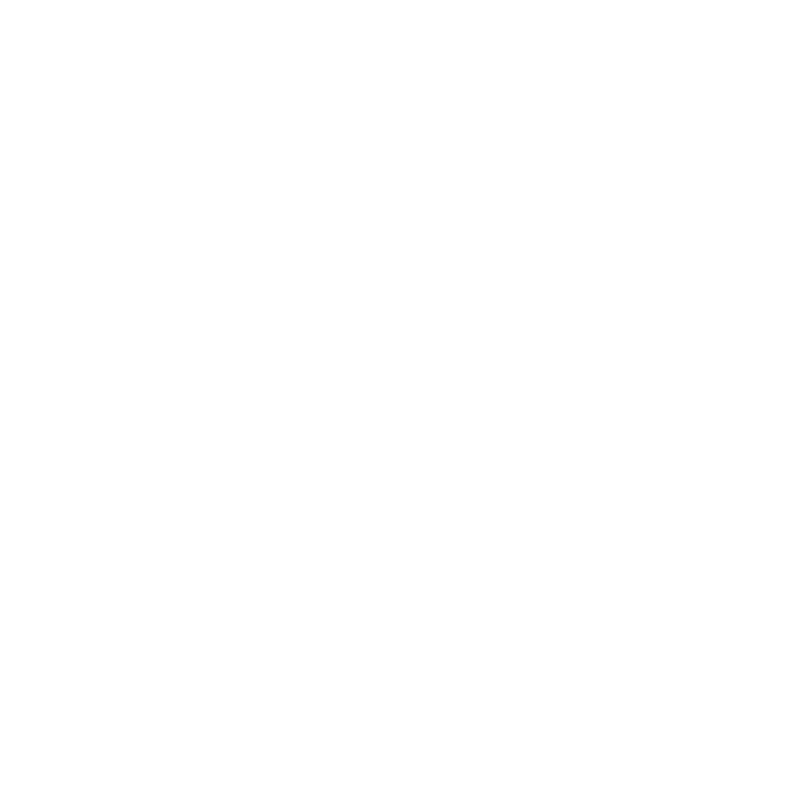

<IPython.core.display.Javascript object>


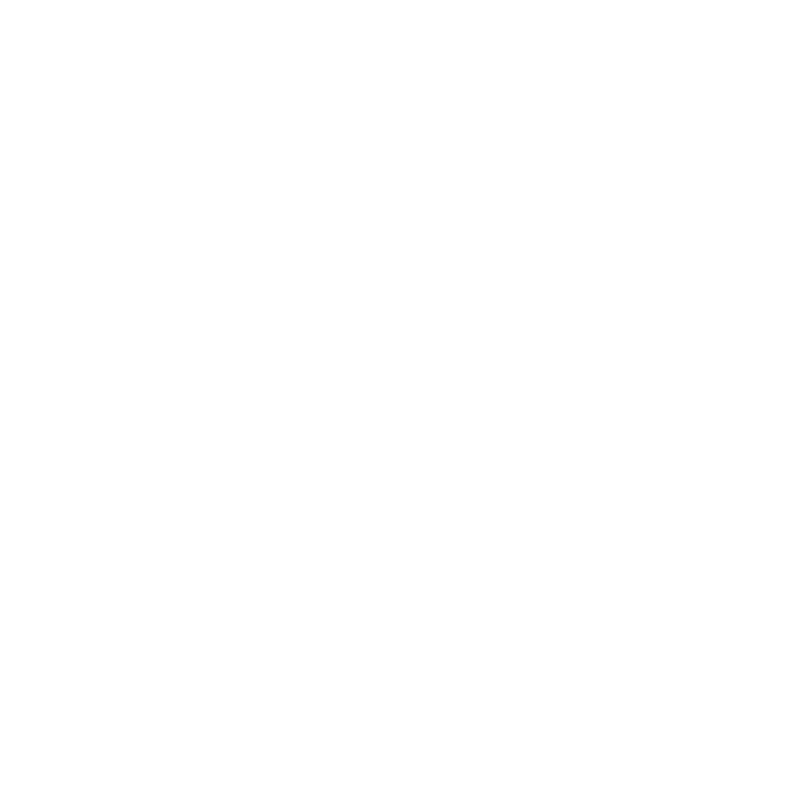

<IPython.core.display.Javascript object>


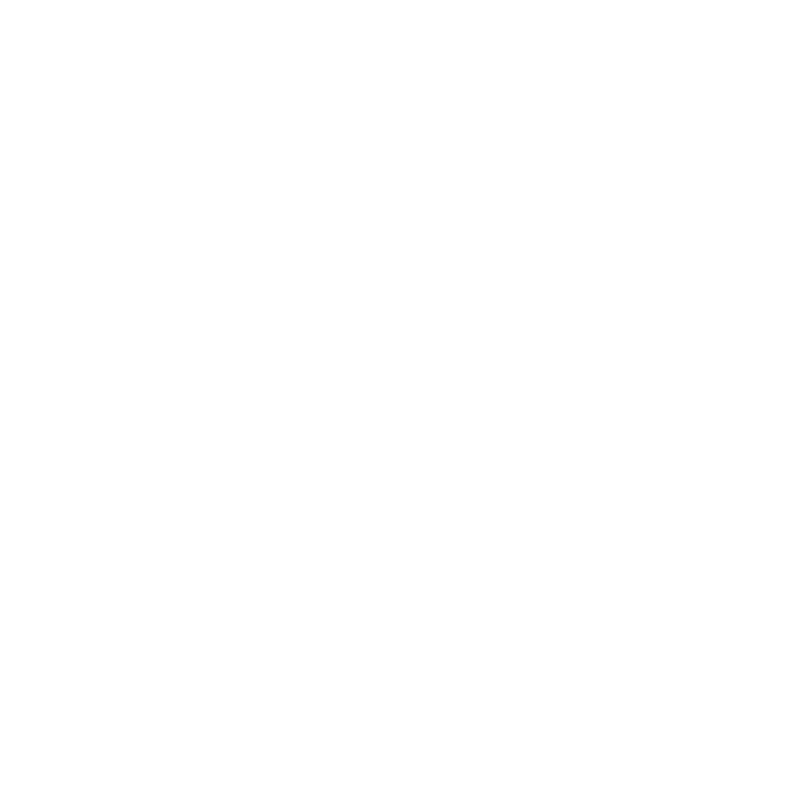

<IPython.core.display.Javascript object>


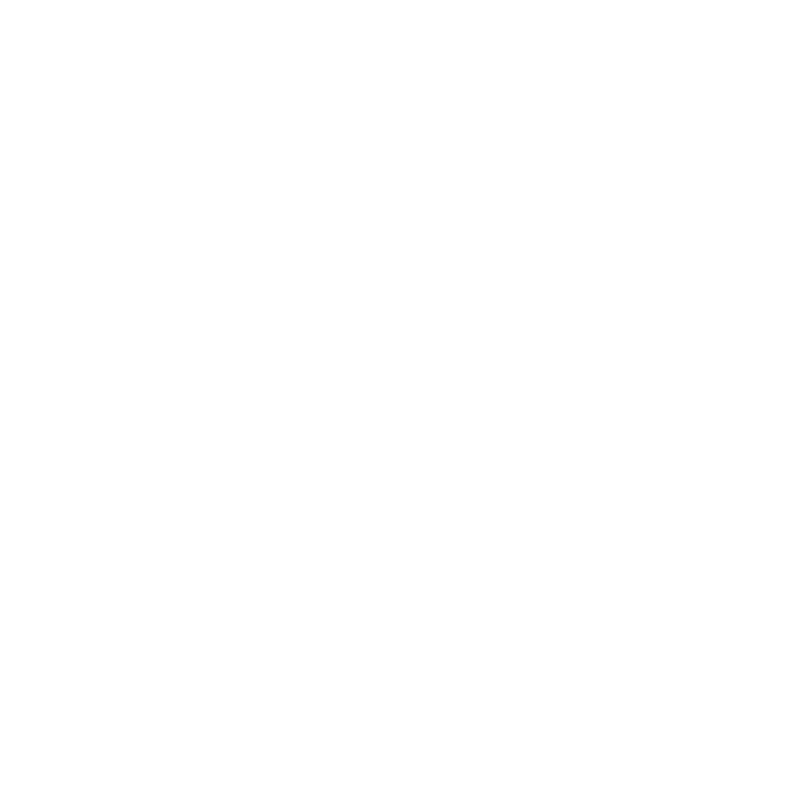

<IPython.core.display.Javascript object>


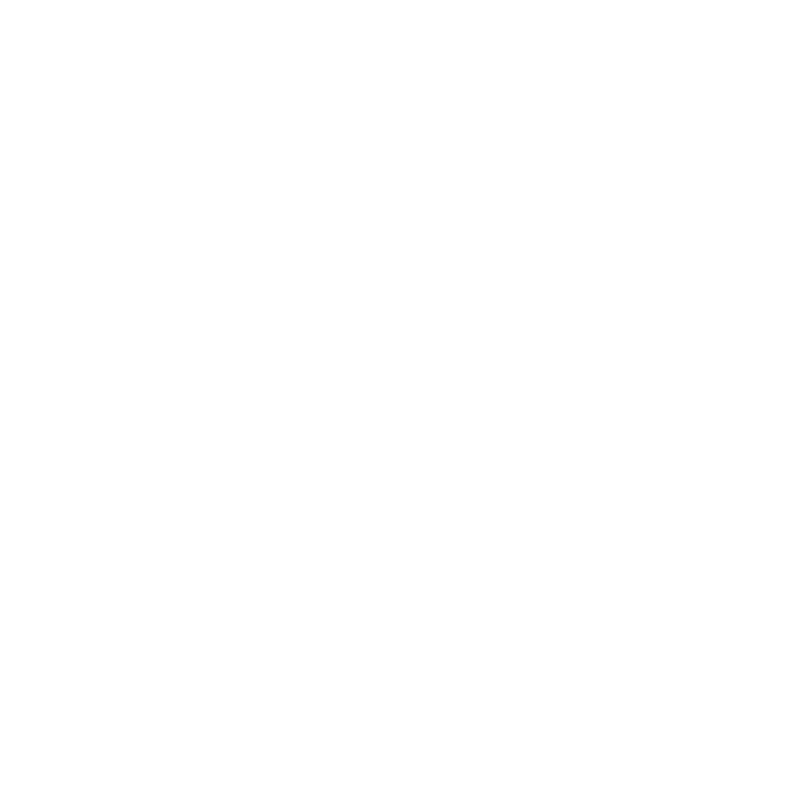

<IPython.core.display.Javascript object>


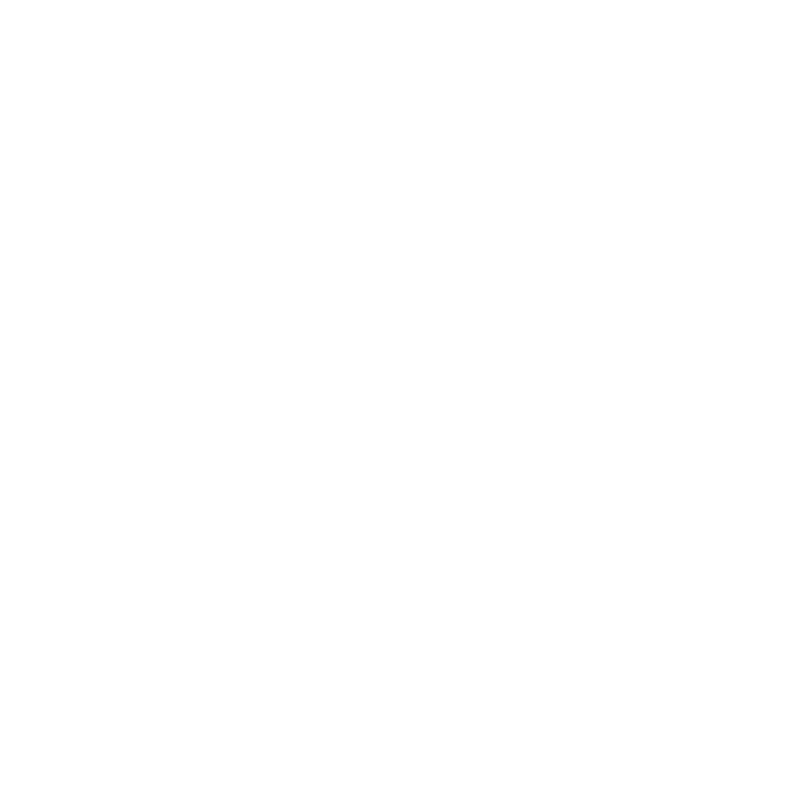

<IPython.core.display.Javascript object>


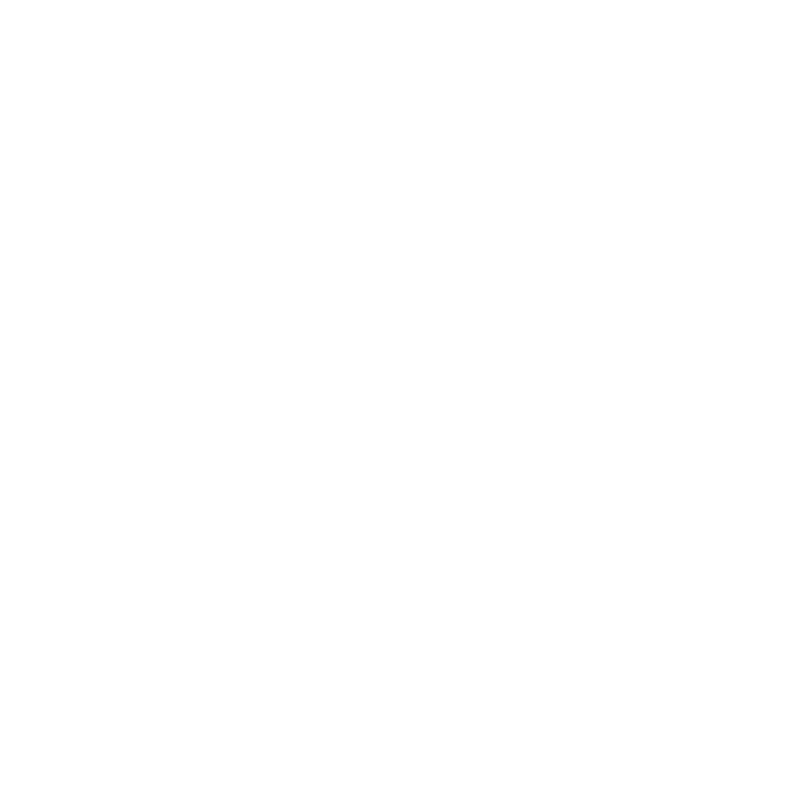

<IPython.core.display.Javascript object>


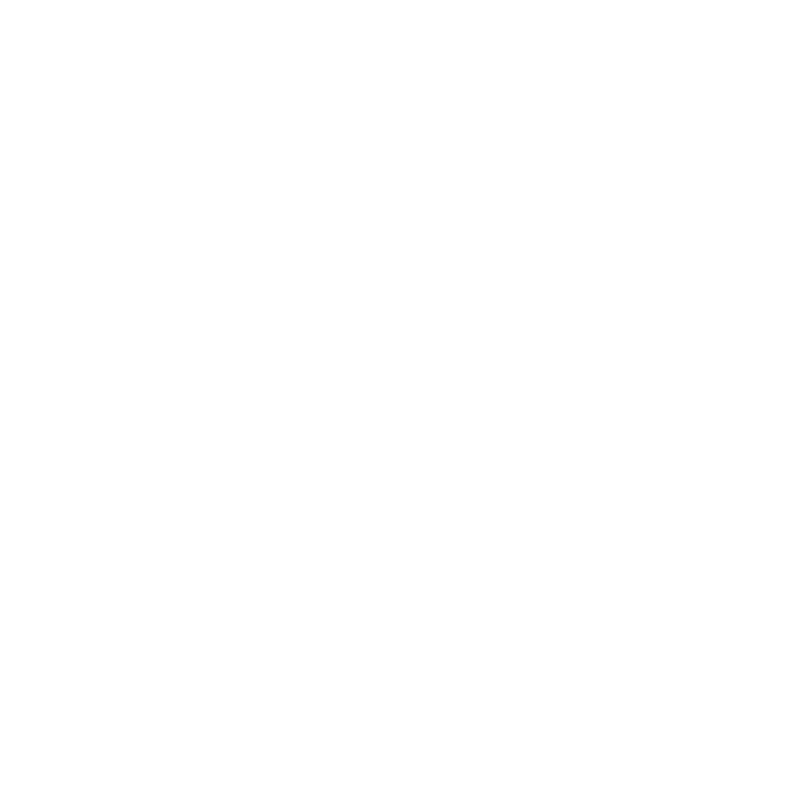

<IPython.core.display.Javascript object>


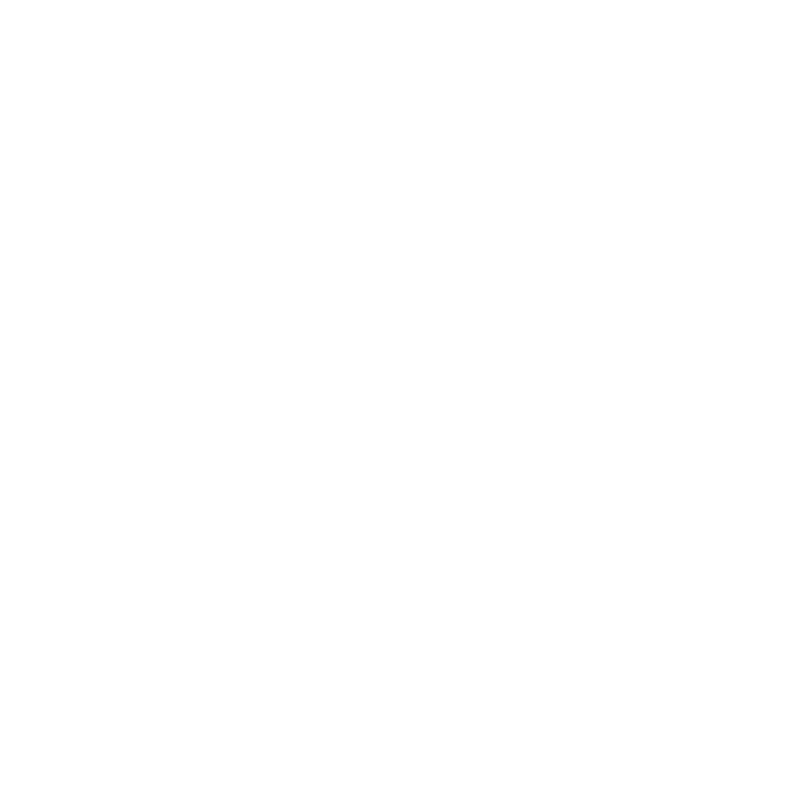

<IPython.core.display.Javascript object>


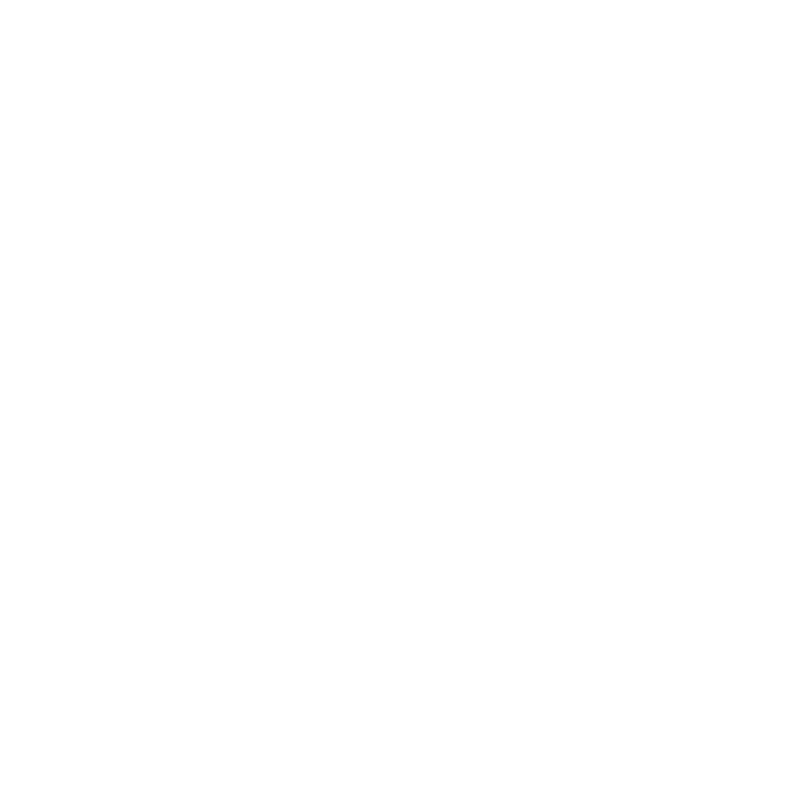

<IPython.core.display.Javascript object>


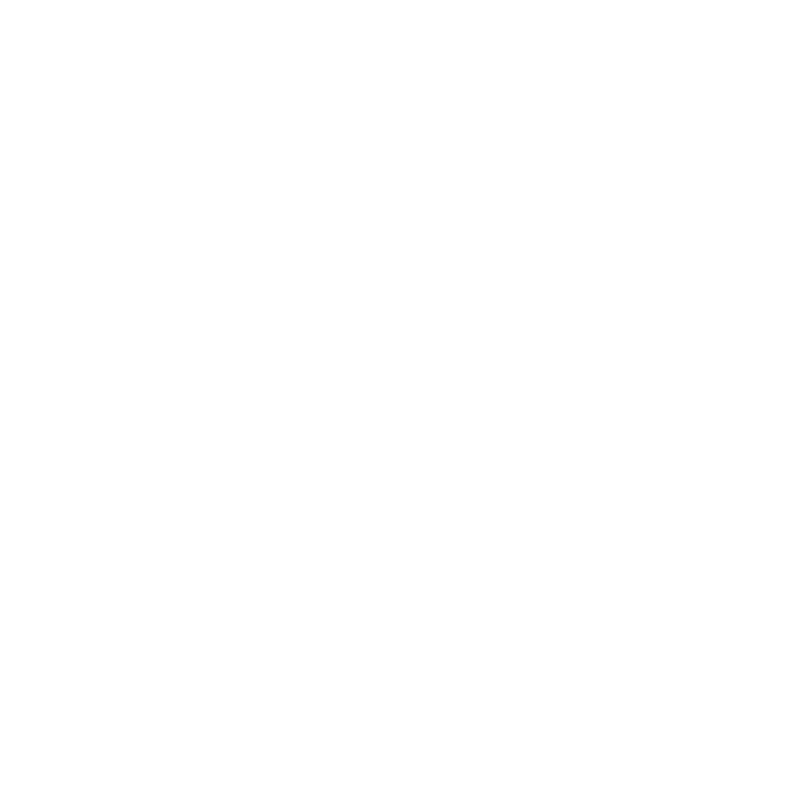

<IPython.core.display.Javascript object>


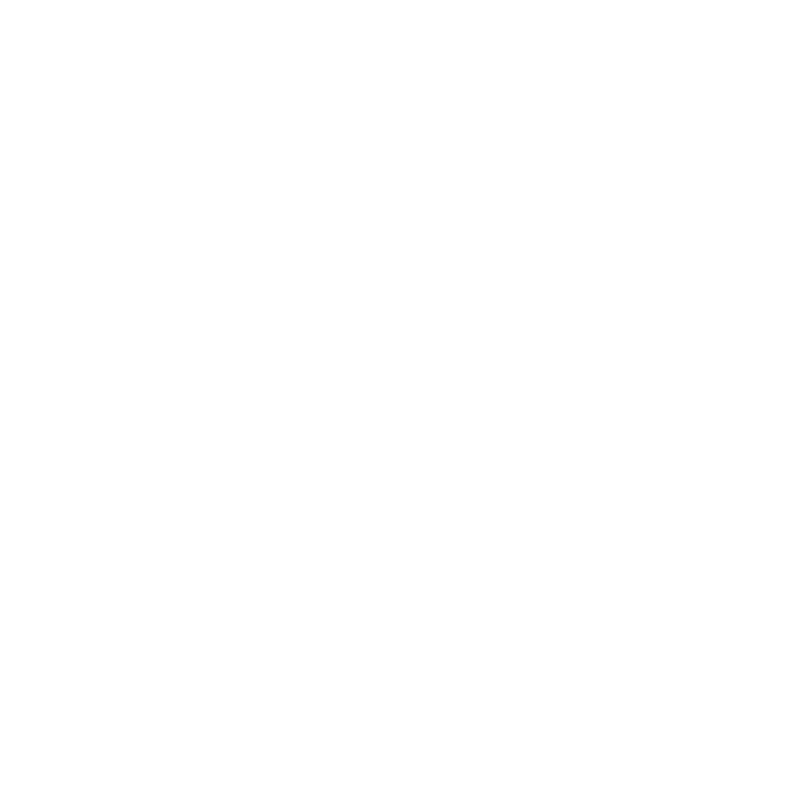

<IPython.core.display.Javascript object>


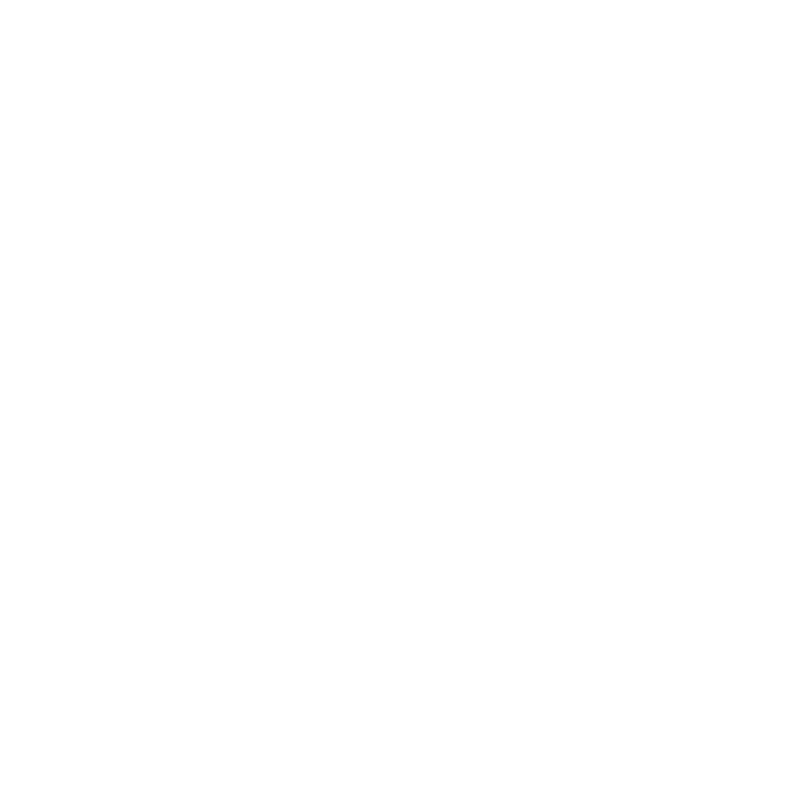

<IPython.core.display.Javascript object>


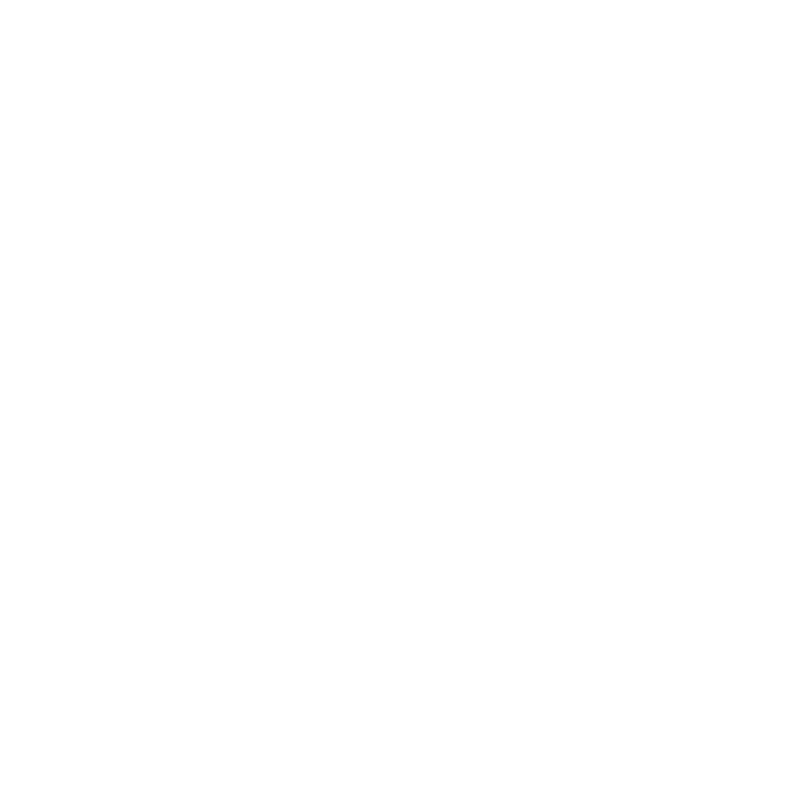

<IPython.core.display.Javascript object>


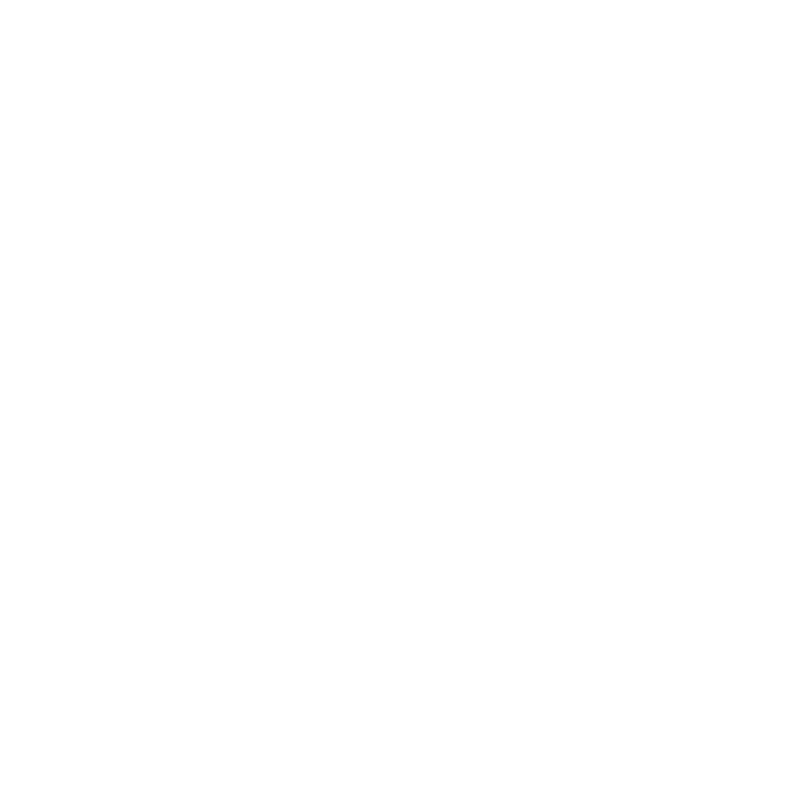

<IPython.core.display.Javascript object>


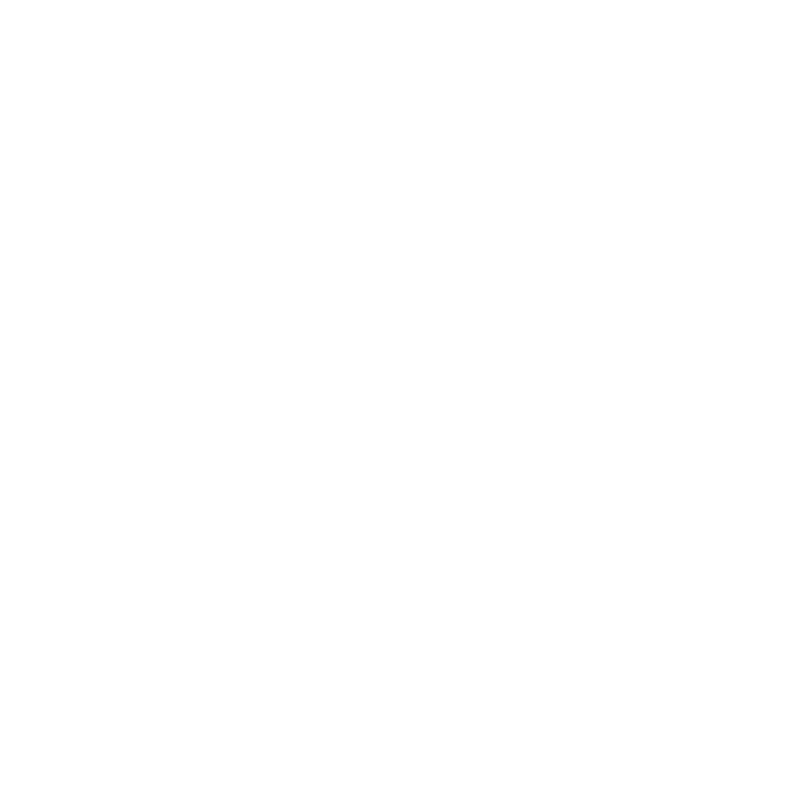

<IPython.core.display.Javascript object>


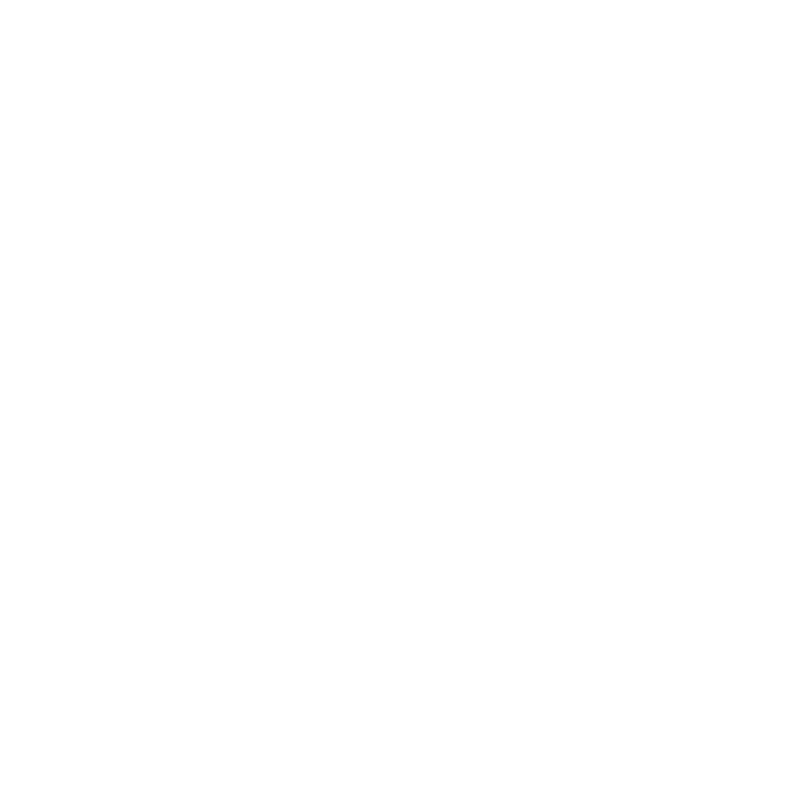

<IPython.core.display.Javascript object>


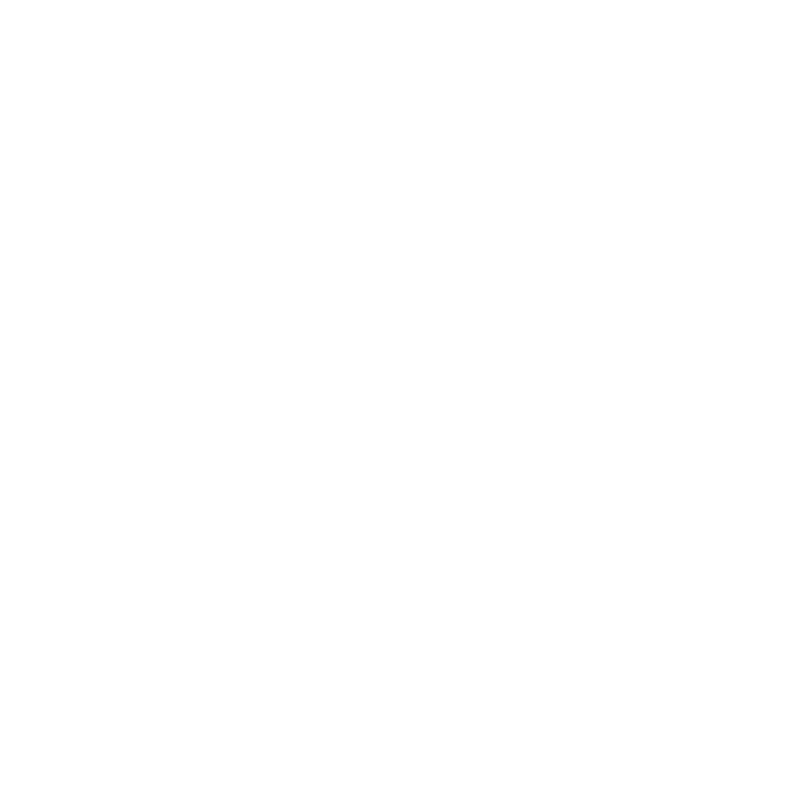

<IPython.core.display.Javascript object>


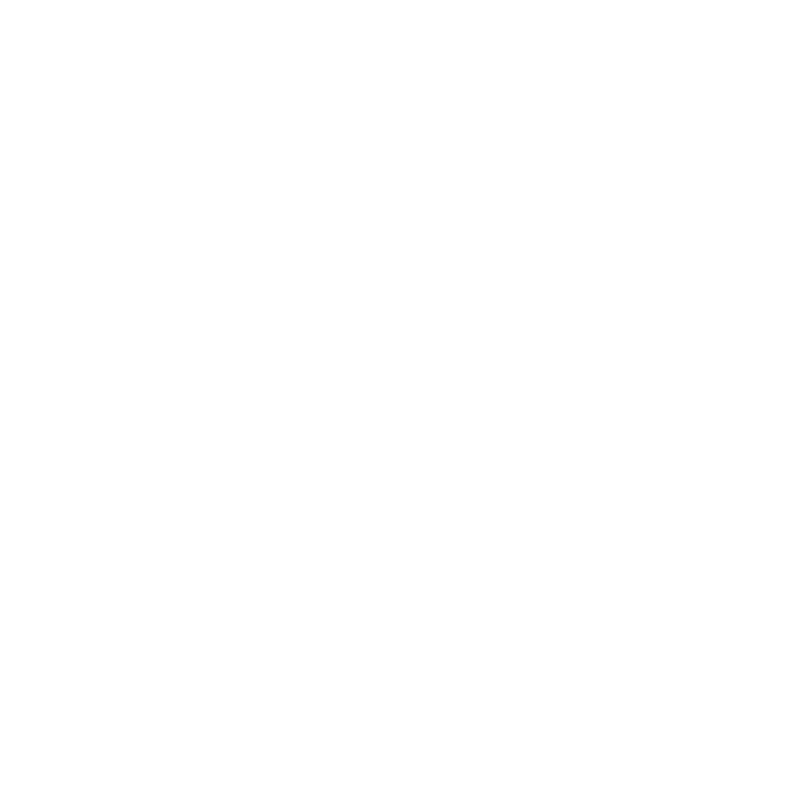

<IPython.core.display.Javascript object>


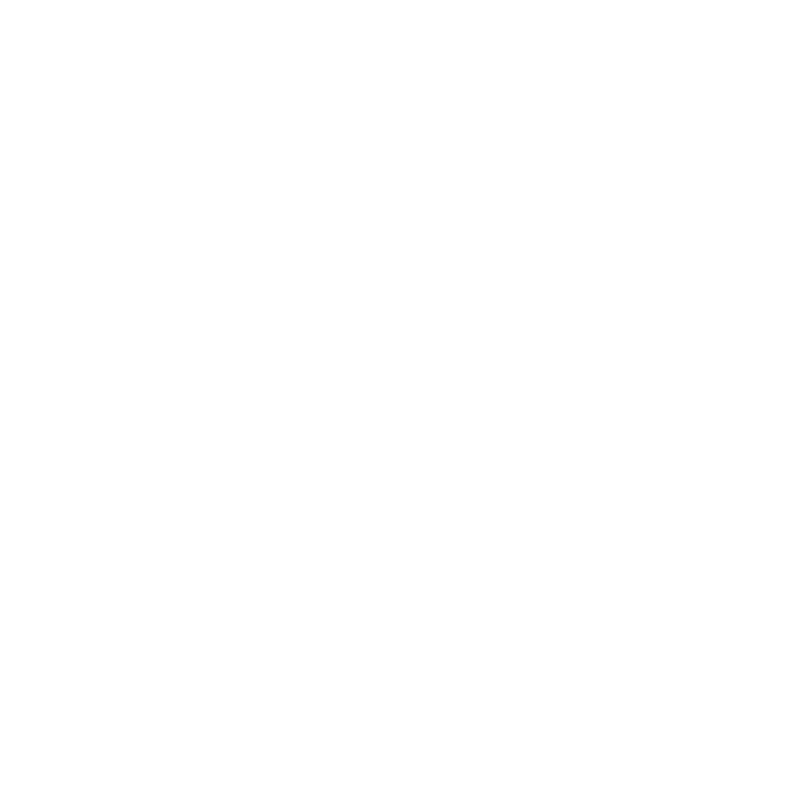

<IPython.core.display.Javascript object>


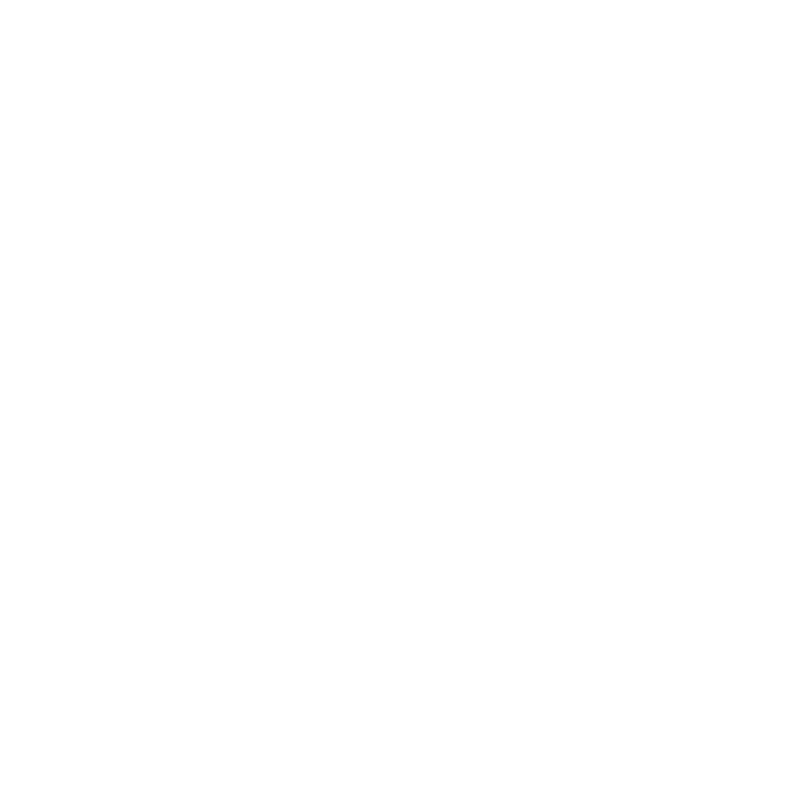

<IPython.core.display.Javascript object>


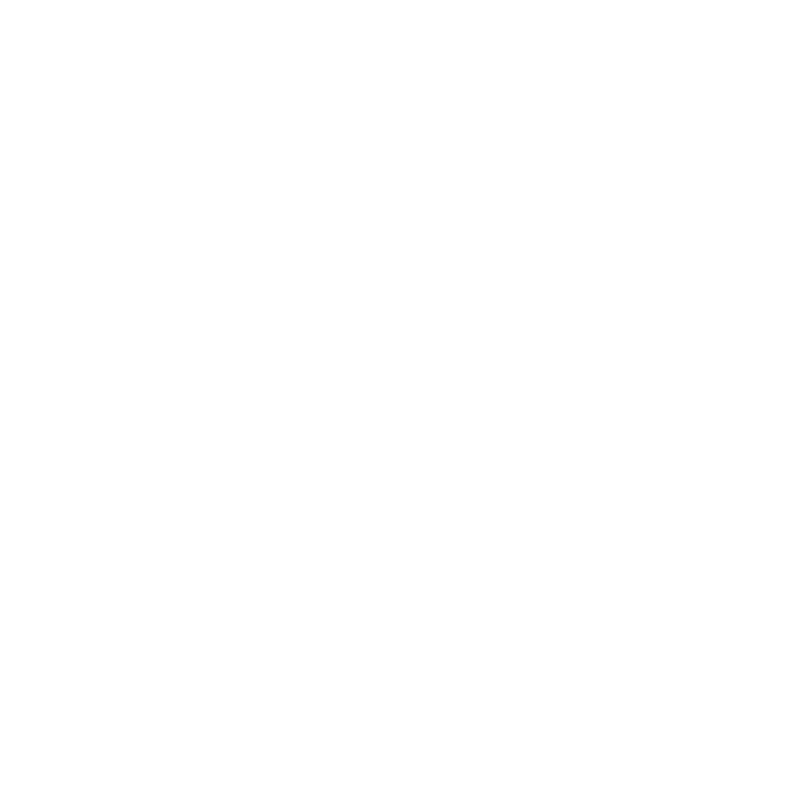

<IPython.core.display.Javascript object>


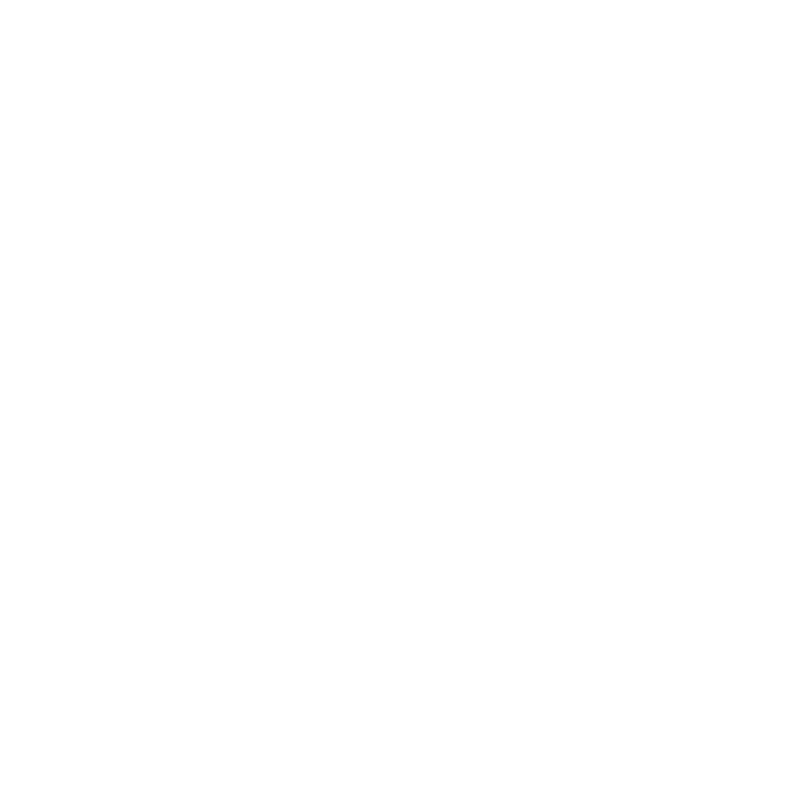

<IPython.core.display.Javascript object>


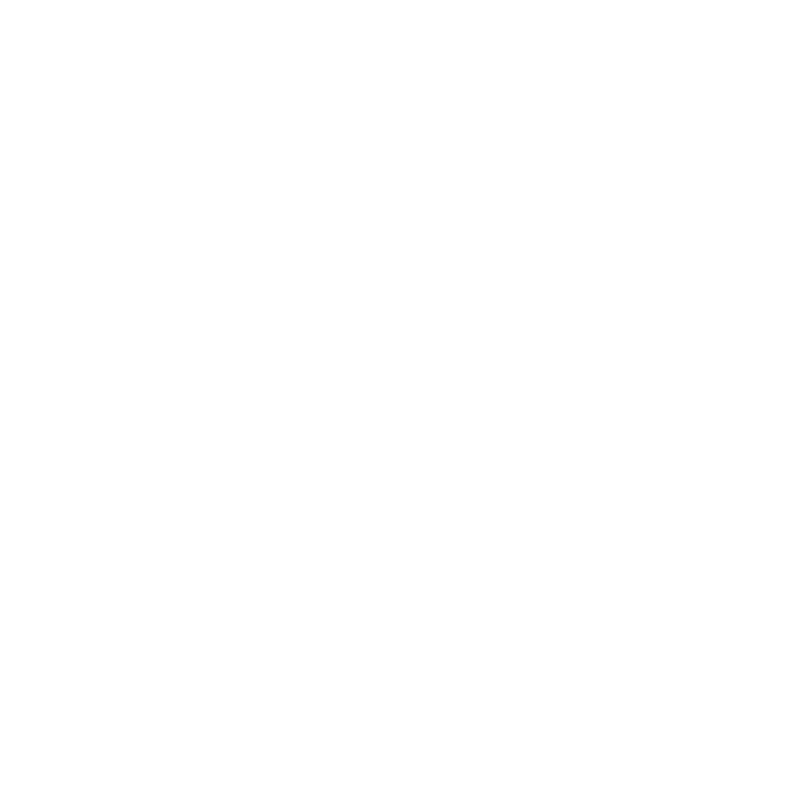

<IPython.core.display.Javascript object>


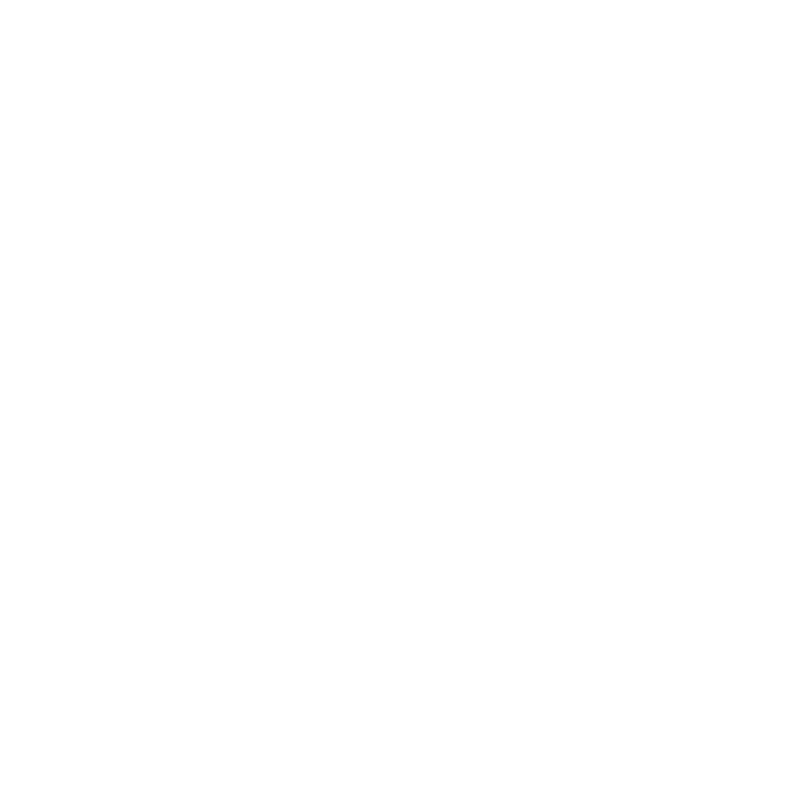

<IPython.core.display.Javascript object>


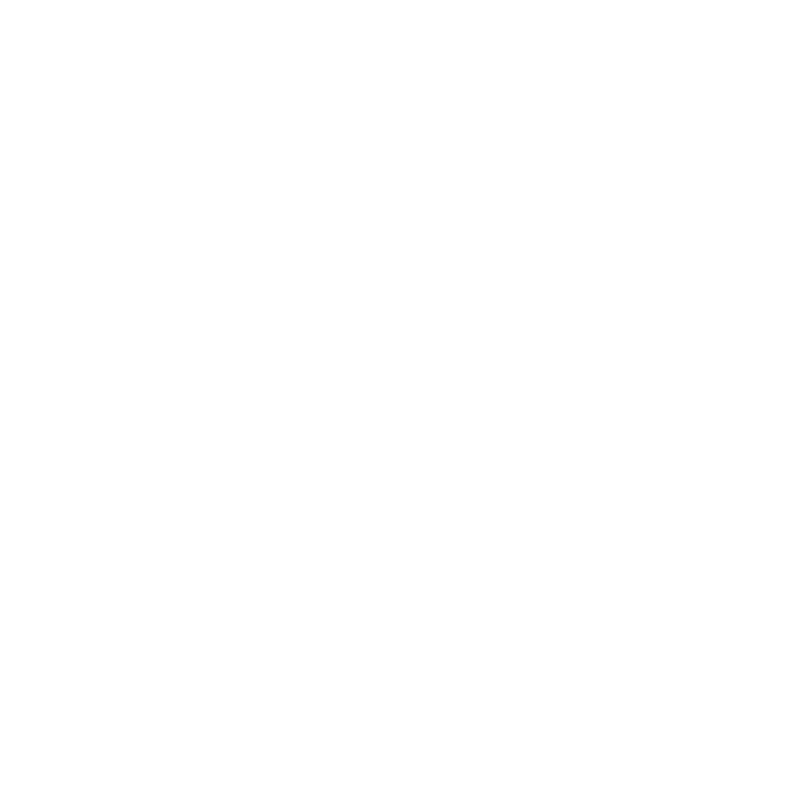

<IPython.core.display.Javascript object>


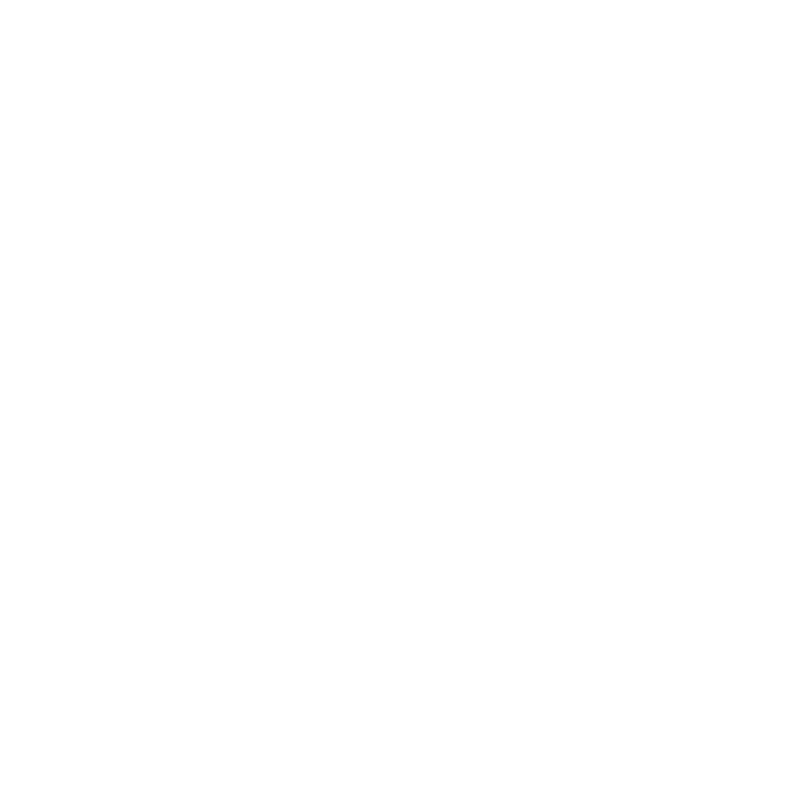

<IPython.core.display.Javascript object>


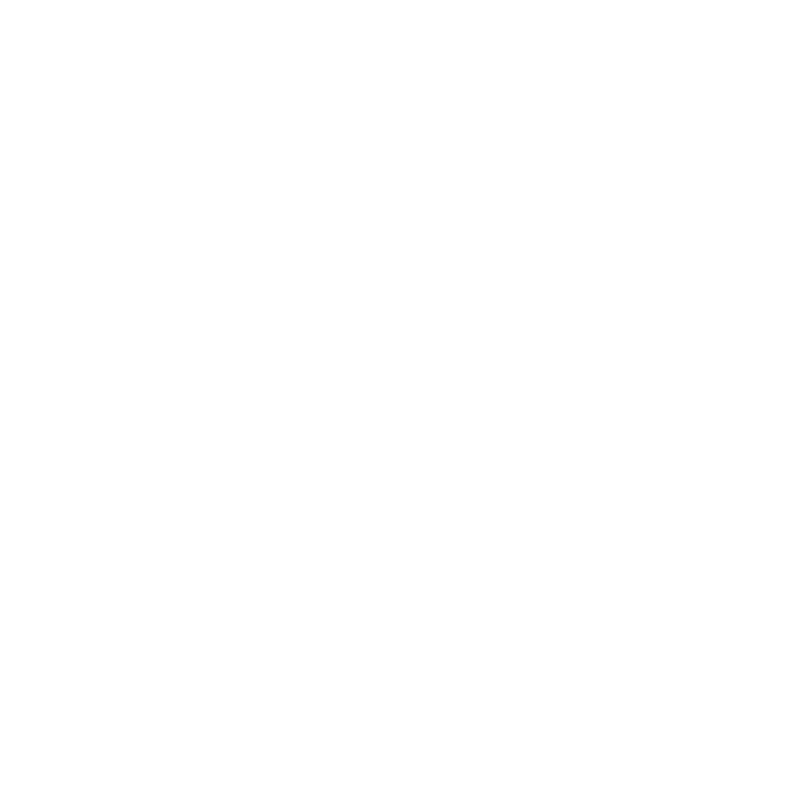

<IPython.core.display.Javascript object>


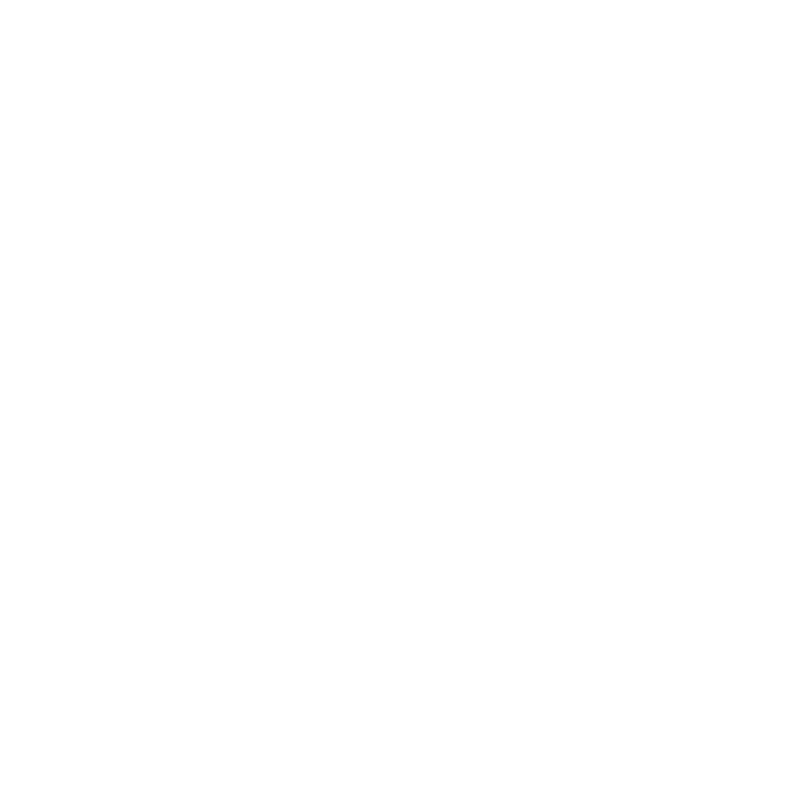

<IPython.core.display.Javascript object>


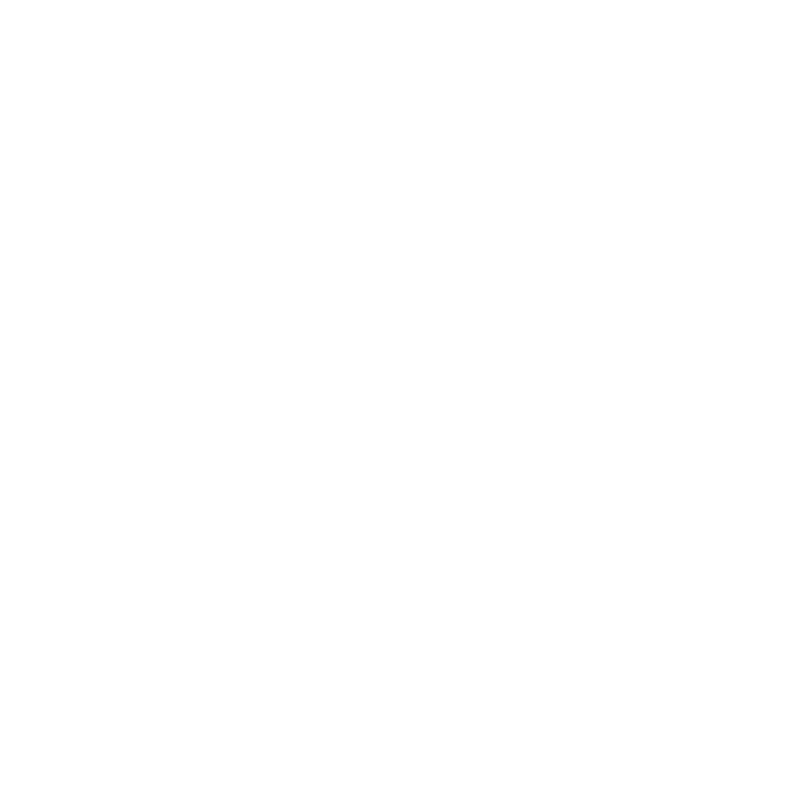

<IPython.core.display.Javascript object>


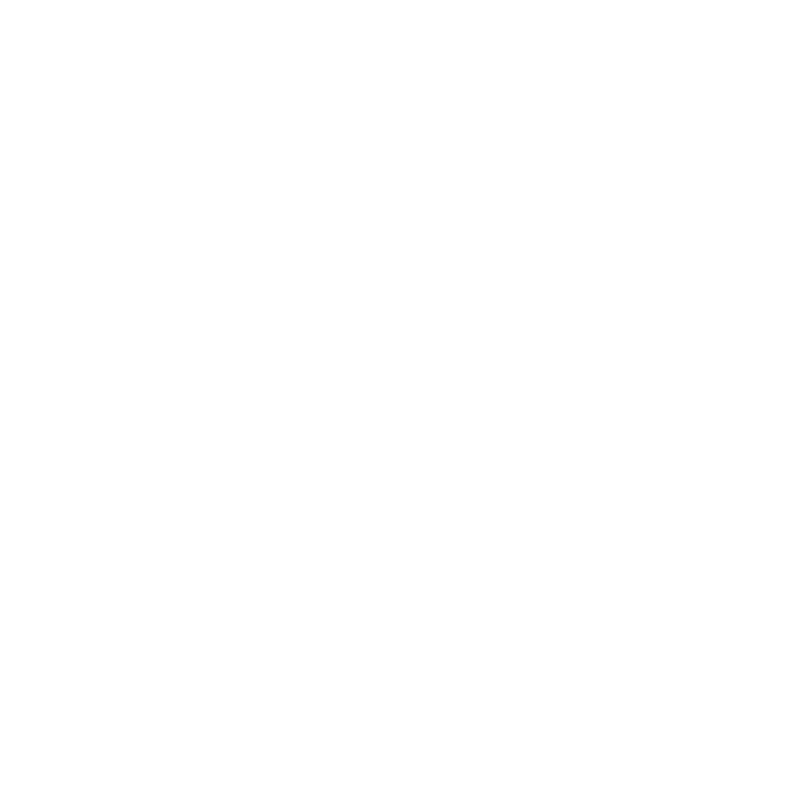

<IPython.core.display.Javascript object>


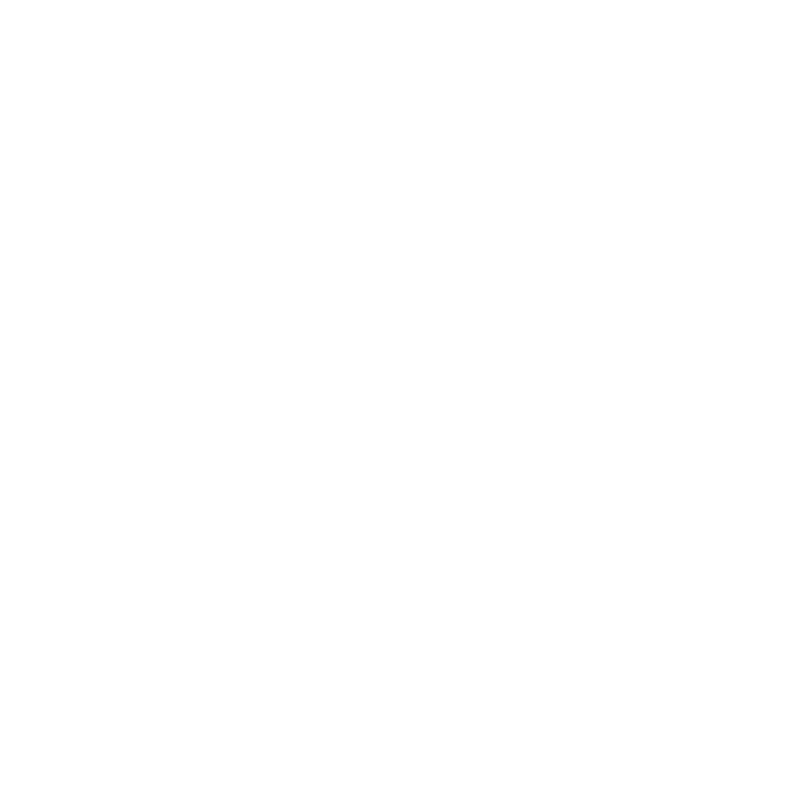

<IPython.core.display.Javascript object>


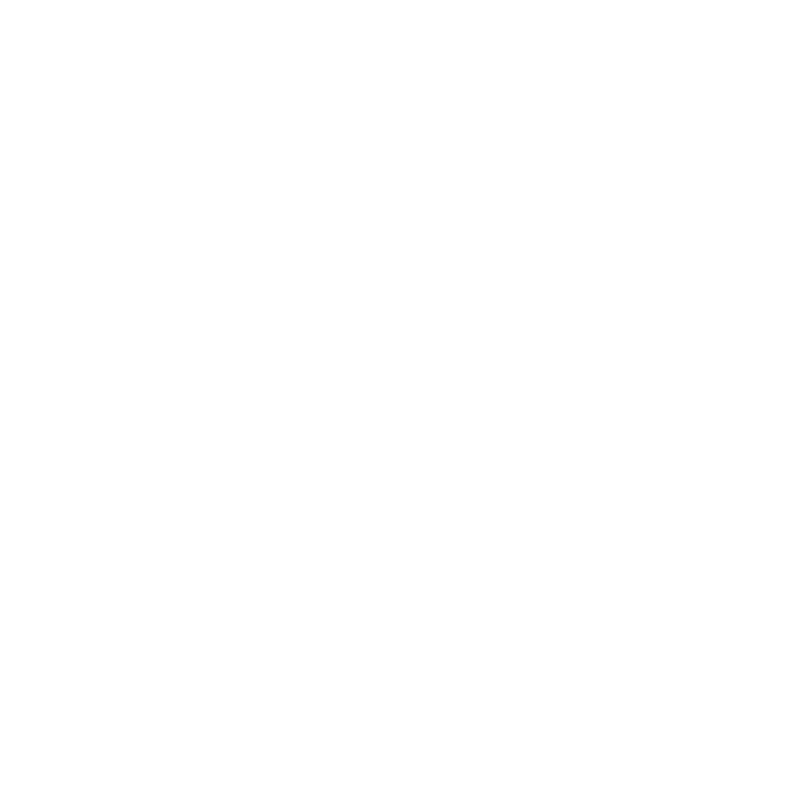

<IPython.core.display.Javascript object>


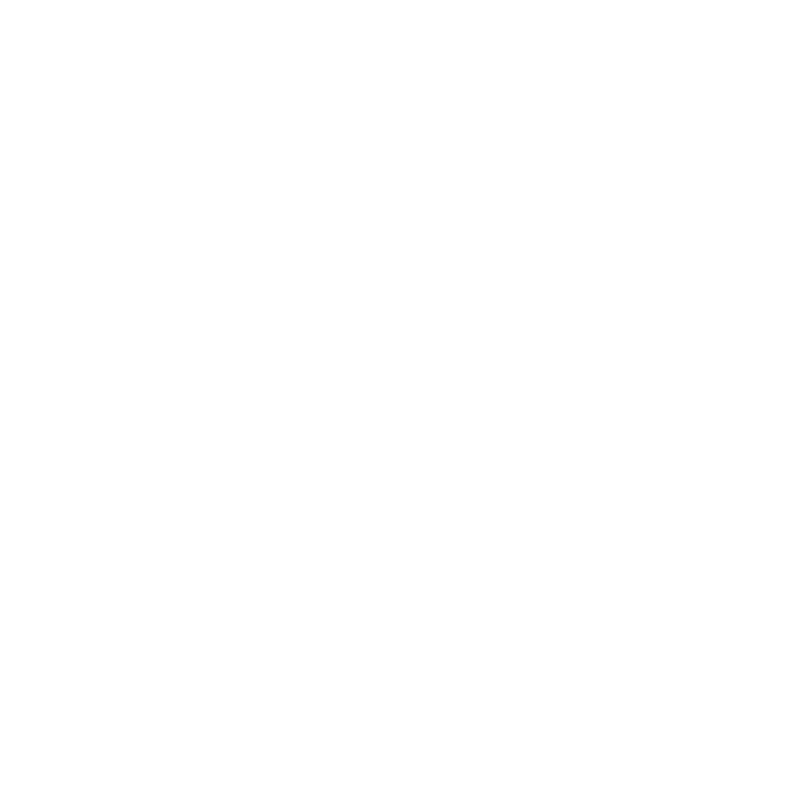

<IPython.core.display.Javascript object>


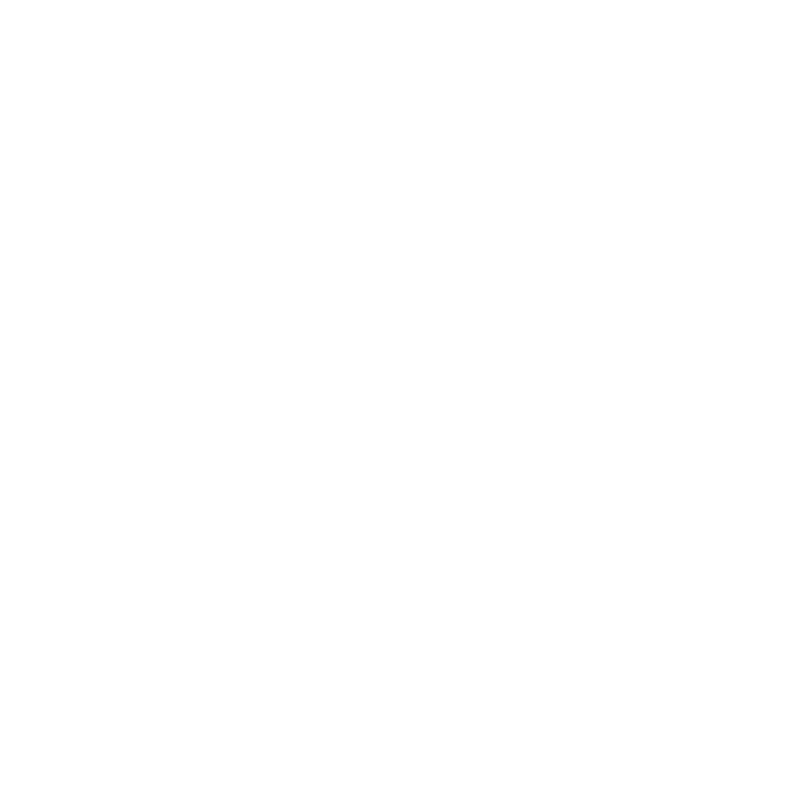

<IPython.core.display.Javascript object>


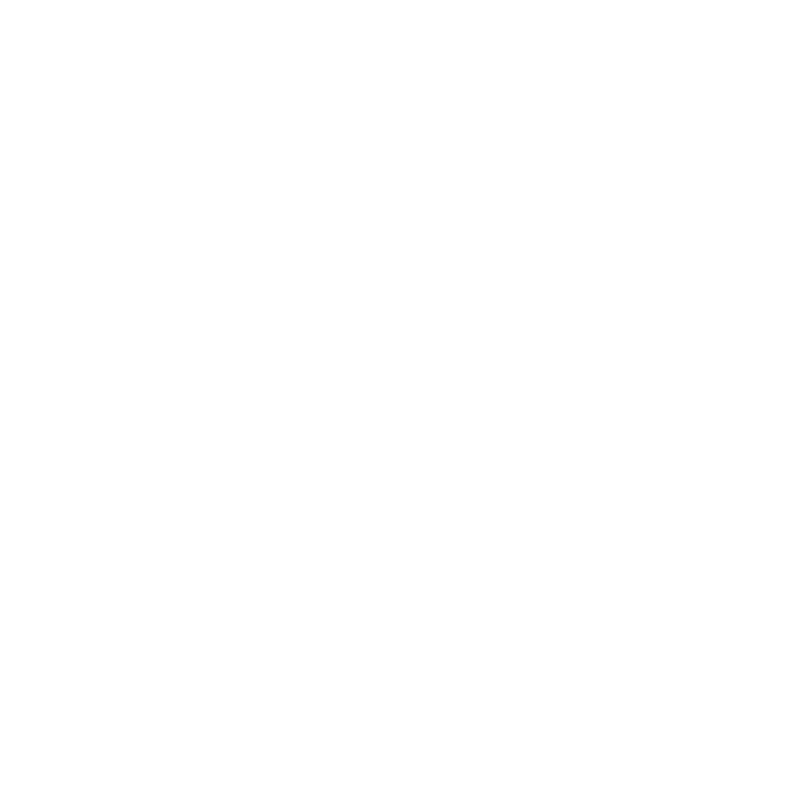

<IPython.core.display.Javascript object>


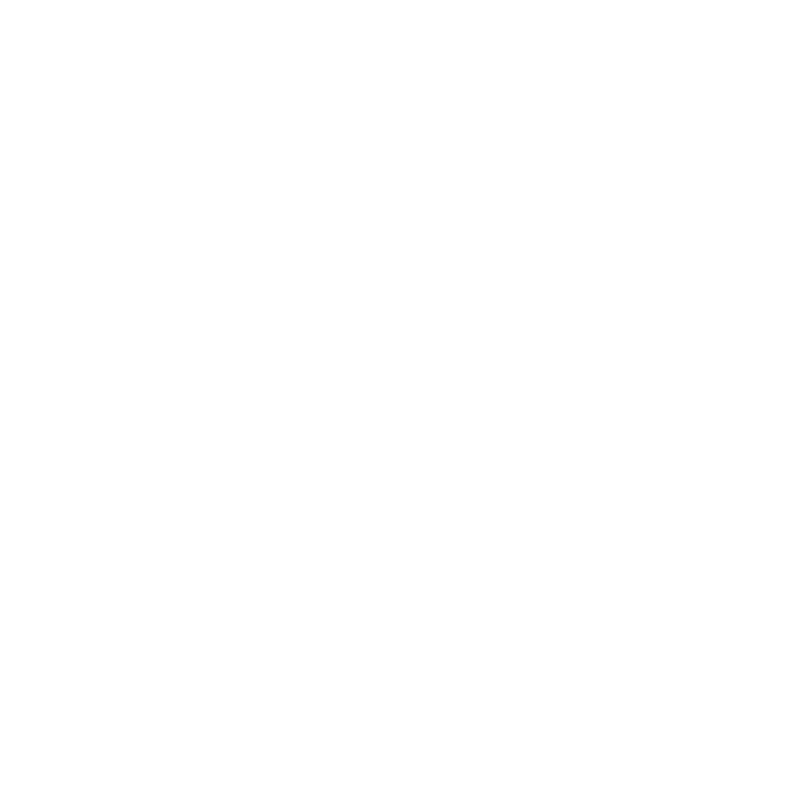

<IPython.core.display.Javascript object>


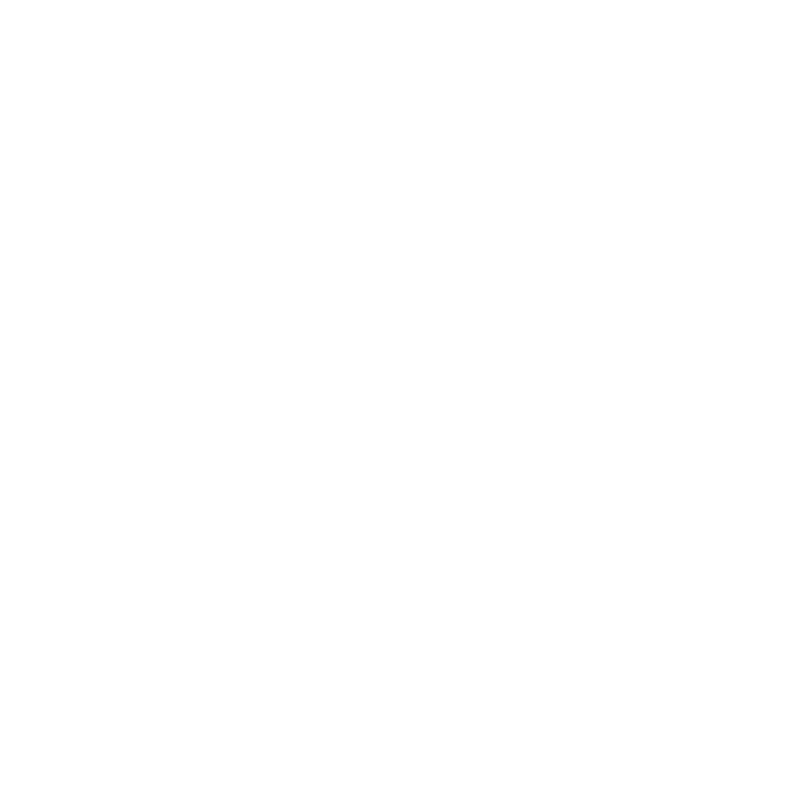

<IPython.core.display.Javascript object>


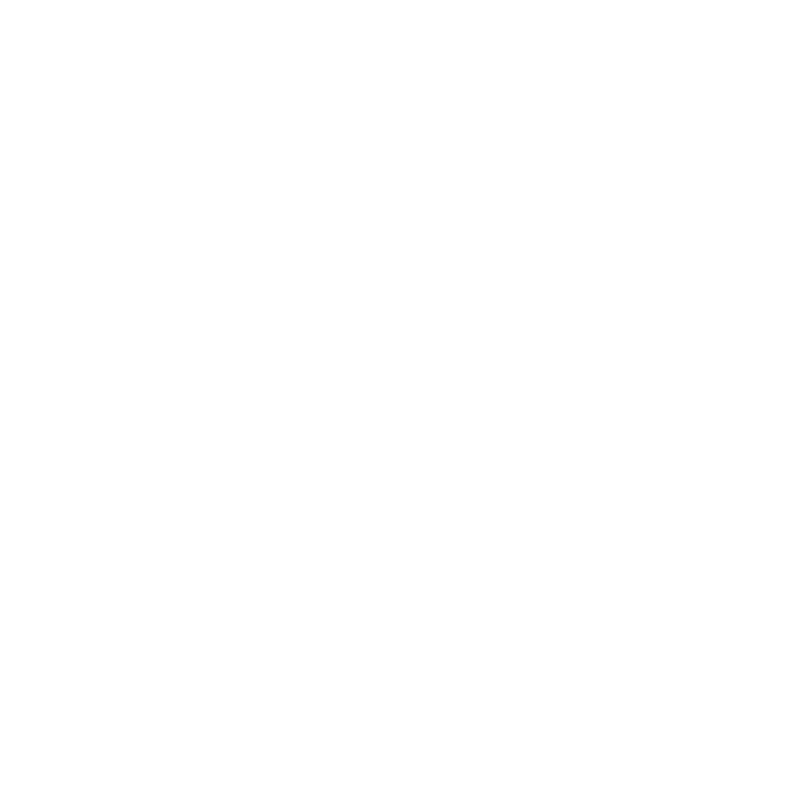

<IPython.core.display.Javascript object>


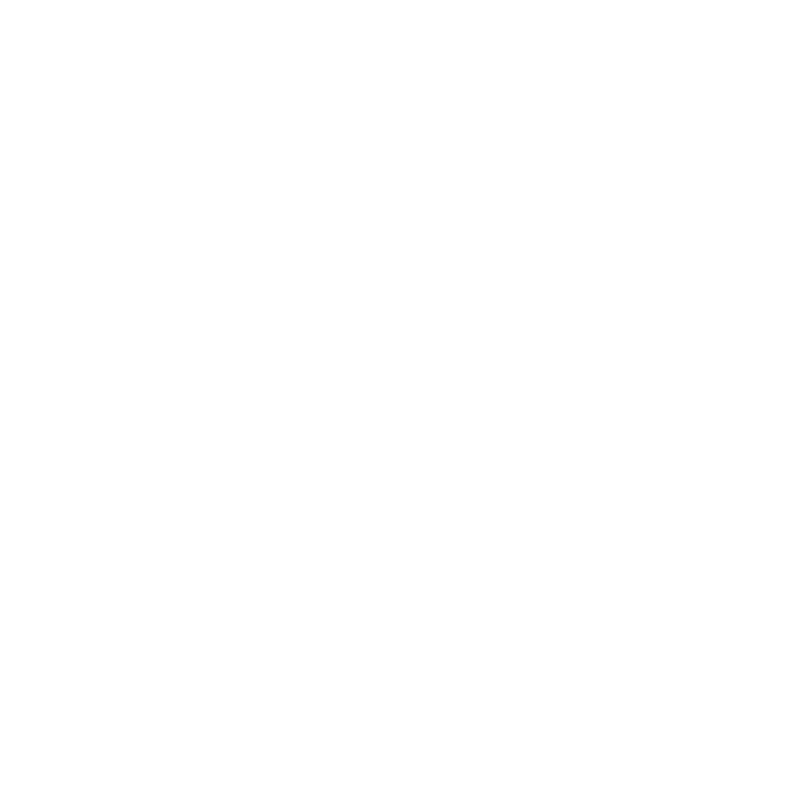

<IPython.core.display.Javascript object>


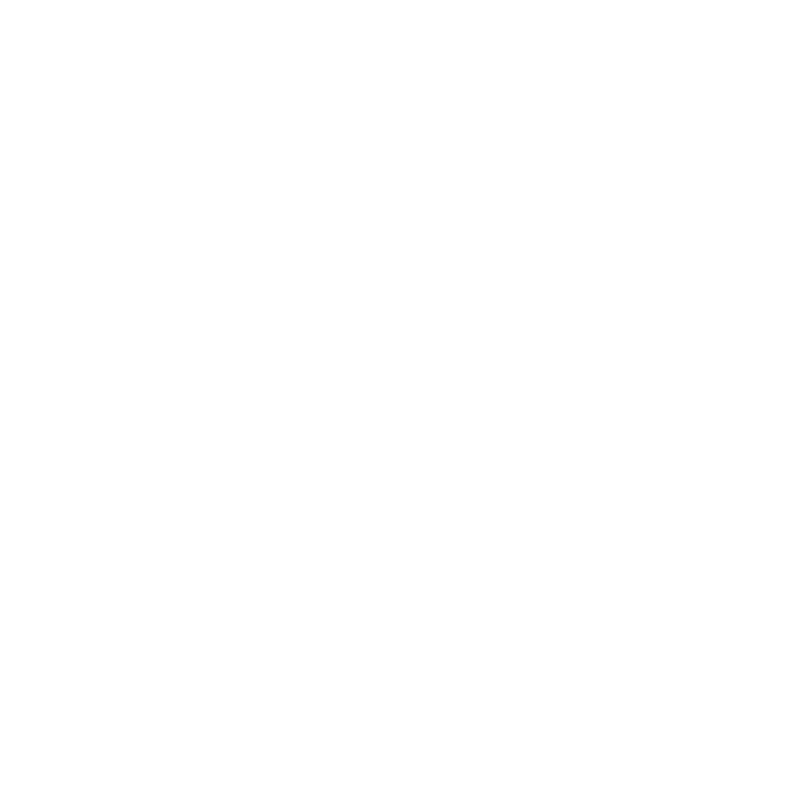

<IPython.core.display.Javascript object>


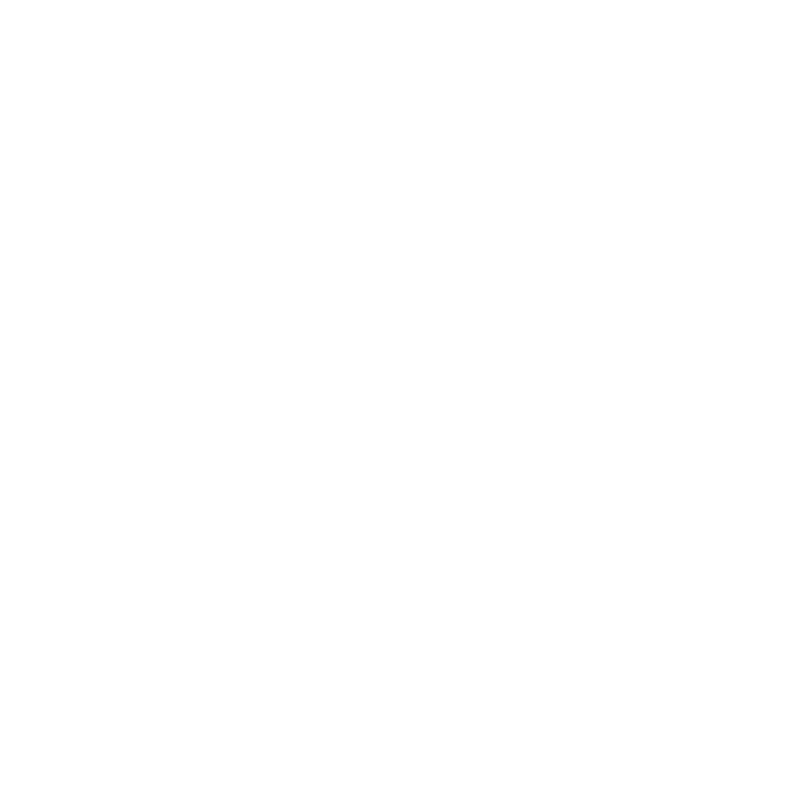

<IPython.core.display.Javascript object>


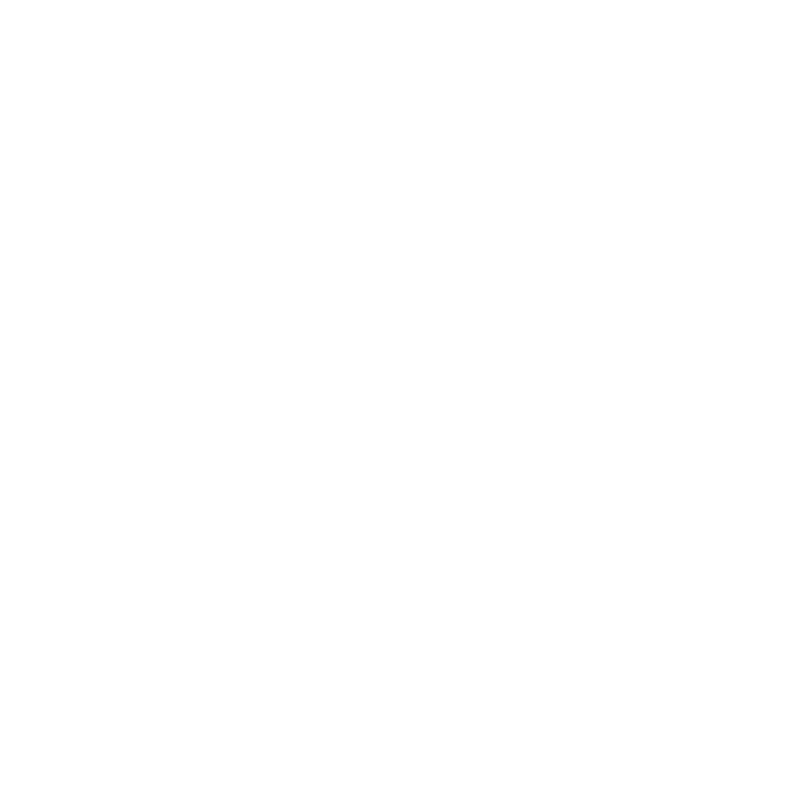

In [36]:
MLlen = len(MasterList)




for i in range(MLlen):
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111, projection='3d')
    Void = MasterList[i]
    N = len(Void)
    colorin = i * np.ones(N)
    ax.scatter(X[Void], Y[Void], Z[Void], cmap=cmap.gist_ncar)
    plt.savefig("{}.png".format(i))
    plt.close()
    

In [34]:
len(MasterList)

46

<IPython.core.display.Javascript object>


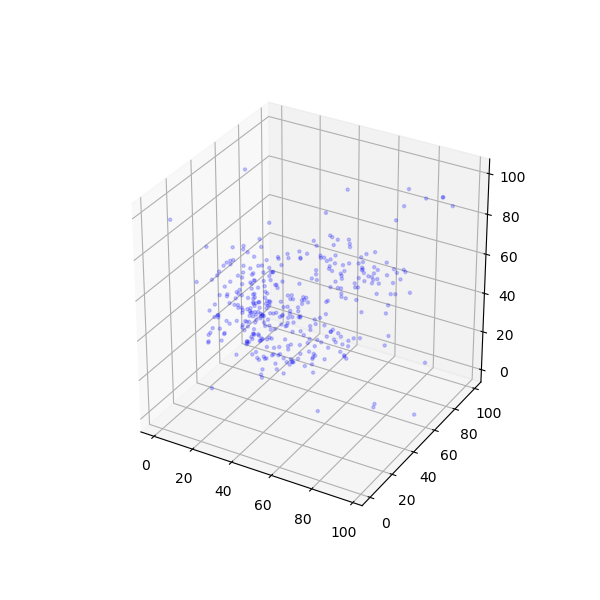